#Projeto Mineração de Dados - Shill Bidding Dataset

Grupo: 
- Filipe Melo
- Ismael Cesar
- Thiago Melo

**Change log:**
- **Entrega 1:**
  - Escrevemos a seção Compreesão do Problema.
  - Começamos a escrever a parte de descrição dos atributos
- **Entrega 2:**
  - Mudanças estéticas na seção de compreensão do Problema.
  - Terminamos a descrição de atributos e o resto da seção de Compreensão de dados
- **Entrega 3:** 
  - Escrevemos a seção de Preparação de dados.
- **Entrega 4 (Variação paramétrica - Parte 1):**
  - Adicionamos um comentário final após todos os gráficos na compreensão dos dados
  - Adicionamos um comentário no final da seção de Preparação dos dados sobre o oversampling
  - Fizemos o nosso script de como faremos a avaliação. Utilizamos GridSearch para os modelos mais baratos e Random Search para os mais caro. Também definimos um dicionário de parâmetros para o dataset baseline. Utilizamos o mesmo dicionário de parâmetros para o dataset com redução manual de atributos e para o com PCA. Na próxima entrega devemos otimizar melhor os dicionários de parâmetros, e fazer um dicionário para cada modelo e dataset. De todo jeito, rodamos o modelo e comentamos como ele se sai em relação ao baseline (usando o mesmo dicionário)
- **Entrega 5 (Variação paramétrica - Parte 2):**
  - Modificamos um pouco o texto inicial da parte "Variação paramétrica dos modelos/Metodologia da avaliação"
  - Adicionamos os experimentos dos modelos com Oversampling na seção de Variação paramétrica. 
  - Adicionamos a acurácia média em relação aos splits e desvio padrão do melhor classificador encontrado pela busca
  - Adicionamos experimentos para modelos baseados em comitês na seção de variação de parâmetros, para bases de dados com e sem oversampling no conjunto de treinamento. Utilizamos os modelos de ensemble Random Forest, Bagging, Boosting e Stacking. Os executamos para alguns datasets, mas como eles possuem um tempo de execução maior, não conseguimos executas todos a tempo.
- **Entrega 6 - Relatório final:**
  - Na seção de Metodologia da avaliação, fizemos algumas alterações no texto.
  - Criamos a seção de dicionário dos hiperparâmetros para explicar como fizemos os dicionários para cada modelo, e falar um pouco de cada hiperparâmetro. Retiramos os textos que estavam logo antes da execução de cada modelo e colocamos tudo nesse nova seção.
  - Adicionamos um dicionário que salva todos os scores utilizados nas comparações, na seção de Variação paramétrica. Baseado neste dicionário, criamos um dataframe para melhor organizar a visualisação dos dados criar uma tabela com um relatório geral para cada base de dados. 
  - Removemos os comentários feitos logo após a execução de cada modelo, para comentar todos os resultados no final.

#Compreensão do Problema

O problema abordado pela equipe trata-se de um problema de detecção de Shill-Bidding leilões virtuais Ebay, cuja base de dados para análise e inferência está disponibilizada no repositório de base de dados da UCI a partir do link a seguir: 

- https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset

Nas últimas décadas, vimos um crescimento forte do comércio eletrônico e de leilões virtuais, mas acompanhado disso vimos o crescimento de práticas fraudulentas como o "Shill Bidding". 

"Shill Bidding" trata-se uma fraude em leilões virtuais, onde donos de produtos (ou seus cúmplices) criam contas falsas para gerar uma demanda e aumentar os preços do produto artificialmente, então quando um comprador honesto propõe um lance cobrindo os lances anteriores o mesmo acaba pagando mais que deveria, já que o preço foi aumentado artificialmente. Segundo o Internet Crime
Complain Centre (IC3) (Fonte: I.C.C. Center, “2015 internet crime report,” in 2015 IC3 Report) fraudes em leilões virtuais é um dos cyber-crimes mais comuns.

A prática de "Shill Bidding" é um problema para a plataforma do ebay, desde os seus primeiros anos, e é uma preocupação da empresa tomar ações contra isso. Recentemente, eles removeram o maior vendedor de "trading cards" do site, removendo mais de 18000 anúncios feitos pelo usuário. Fonte:
 
- https://www.eseller365.com/ebay-removes-trading-card-seller-shill-bidding/

O tema foi abordado em dois artigos:
- `Alzahrani A, Sadaoui S. Scraping and preprocessing commercial auction data for fraud classification. arXiv preprint. 2018 Jun 2`
  
   Esse artigo descreve uma extração de dados de leilões do iPhone 7 no eBay. A coleta foi feita através de webscrapping e durou 3 meses a partir de março de 2017. A busca alta pelo produto impulsionou um grande número de leiloeiros, sendo obtidos em média 3808 novos leilões diariamente durante o mês de junho de 2017.
   
  Uma vez que os dados não foram obtidos de fontes estruturadas, houve um longo trabalho de pré-processamento. Diversos leilões foram ignorados nesse processo, como aqueles em que o leiloeiro cancelou a oferta ou os que o preço inicial foi maior que o preço vencedor. 

- `Alzahrani A, Sadaoui S. Clustering and labeling auction fraud data. InData Management, Analytics and Innovation 2020 (pp. 269-283). Springer, Singapore`

  Este trabalho descreve como foi feita a rotulação dos exemplos de dados após a coleta. Uma vez os dados coletados e preprocessados, os autores utilizadam o algoritmo de agrupamento hierárquico CURE, o qual cada cluster é identificado por pontos representativos espalhados pela fronteira dos mesmos. A cada iteração os pontos representativos são selecionados de modo a diminuir a distância dos mesmos relativa ao centroid do cluster, onde a atualização é feita segundo um fator de encolhimento alfa $\alpha$.  
  
   Uma vez computados so clusters, começa-se a etapa de rotuação dos dados. Onde os autores definem $\mu -\frac{1}{2}\sigma$ como limiar ótimo para rotulação das instâncias. Onde $\mu, \sigma$ são média e desvio padrão dos conjuntos avaliados. Caso a média de um cluster passar o limiar os membros são rotulados como suspeito$(1)$, caso contrário, os membros do mesmo são rotulados como normais$(0)$.

Para o projeto, temos como objetivo detectar quais bidders são fraudulentos e quais não são. Para alcançar isso temos como objetivo de ciência de dados, treinar uma variedade de modelos e otimizar os seus parâmetros, para ver como poderíamos atingir um melhor resultado, utilizando o dataset do Shill Bidding para treino, validação e teste.

Para alcançar esses objetivos, realizaremos uma série de scripts em python. Utilizaremos bibliotecas do python como numpy, pandas, sklearn e seaborn. Seguiremos as etapas do CRISP-DM: Compreensão do Problema, Compreensão dos dados, Preparação dos dados, Modelagem, Avaliação dos Modelos, Deployment. A etapa de deployment será abstraída por se tratar de um projeto de uma disciplina. A expectativa é de realizar uma etapa do CRISP-DM por semana.


---

# Compreensão dos dados

## Descrição dos atributos

In [2]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Primeiramente, vamos fazer uma descrição dos atributos, presentes no dataset. O site do repositório do dataset( https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset ) já descreve os atributos, mas também consultamos o artigo `Alzahrani A, Sadaoui S. Scraping and preprocessing commercial auction data for fraud classification. arXiv preprint. 2018 Jun 2.`, para ver como alguns atributos são definidos matematicamente. Temos então, que:

- **Bidder tendency:** `float` Razão entre o número de leilões que um determinado usuário participou com um específico vendedor e o total de leilões com a participação do usuário
- **Bidding ratio:** `float` razão entre o total de lançes feito por um usuário em um leilão e o número de total de lançes no leilão
- **Successive Outbidding:** `float`, Score atribuido relativo ao número de lançes sucessivos ($N_l$) superiores a lançes anteriores efetuados por um usuário. caso mais que $N_l \ge 3$ o atributo tem um score de $0.5$, caso $N_l \ge 4$ o score é $1$, caso nenhuma das condições sejam alcançadas o atributo recebe score $0$.
- **Last bidding:** `float`, percentual do tempo total da duração do leilão em que um usuário fez seu último lançe antes de desconectar-se
- **Auction Bids:** `float`, $$1-\frac{\mu\left(D_{bids}\right)}{A_{bids}}$$ onde $\mu\left(D_{bids}\right)$ é a média total de lançes feitos por leilão, e $A_{bids}$ é o número de lançes feitos no leilão $A$. 
- **Auction Starting price:** `float`, $$1 - \frac{A_{SP}}{\mu\left(D_{SP}\right)}$$ Onde $A_{SP}$ é o preço inicial do leilão $A$. E $\mu\left(D_{SP}\right)$ é o preço inicial médio por leilão. 
- **Early bidding:** `float`, percentual do tempo em que o primeiro lançe foi feito no leilão relativo ao tempo total do leilão
- **Winning Ratio:** `float`, $$1-\frac{Win(U)}{N_{bidding\_ratio \gt 10\%}}$$
Onde $Win(U)$ é o número de leilões ganhos por um usuário $U$. E $N_{bidding\_ratio \gt 10\%}$ é número de leilões cujo **Bidding ratio** é maior que $10\%$. 
- **Auction Duration:** `int`, Duração do leilão em dias


In [3]:
from pandas.core.dtypes.dtypes import CategoricalDtype

COLUMN_NAMES = [
            'RECORD_ID', 'AUCTION_ID', 'BIDDER_ID', 
            'BIDDER_TENDENCY', 'BIDDING_RATIO', 'SUCCESSIVE_OUTBIDDING', 
            'LAST_BIDDING', 'AUCTION_BIDS', 'AUCTION_STARTING_PRICE', 
            'EARLY_BIDDING', 'WINNING_RATIO', 'AUCTION_DURATION',
            'CLASS', 
          ]
COLUMNS_TYPES = {
    'RECORD_ID': str,
    'AUCTION_ID': CategoricalDtype(),
    'BIDDER_ID': CategoricalDtype(),
    'BIDDER_TENDENCY': float,
    'BIDDING_RATIO': float, 
    'SUCCESSIVE_OUTBIDDING': float,
    'LAST_BIDDING': float, 
    'AUCTION_BIDS': float, 
    'AUCTION_STARTING_PRICE': float,
    'EARLY_BIDDING': float,
    'WINNING_RATIO': float,
    'AUCTION_DURATION': int, 
    'CLASS': CategoricalDtype(categories=[0, 1])
}

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00562/Shill%20Bidding%20Dataset.csv',
                    header=0,
                    index_col=False, 
                    names=COLUMN_NAMES)
data = data.astype(COLUMNS_TYPES)
data.sample(5)

,RECORD_ID,AUCTION_ID,BIDDER_ID,BIDDER_TENDENCY,BIDDING_RATIO,SUCCESSIVE_OUTBIDDING,LAST_BIDDING,AUCTION_BIDS,AUCTION_STARTING_PRICE,EARLY_BIDDING,WINNING_RATIO,AUCTION_DURATION,CLASS
131,359,600,o***s,0.040000,0.038462,0.0,0.636009,0.307692,0.993593,0.636009,0.0,7,0
6022,14413,1872,i***h,0.062500,0.020000,0.0,0.882554,0.640000,0.000000,0.882554,0.0,3,0
5719,13681,1278,o***x,0.000000,0.071429,0.0,0.757681,0.000000,0.000000,0.757681,0.0,5,0
5366,12827,1244,p***m,0.666667,0.250000,0.0,0.081019,0.000000,0.000000,0.080972,0.5,1,0
4805,11431,1734,w***0,0.166667,0.100000,0.0,0.783949,0.000000,0.000000,0.783949,1.0,5,0


Pode-se obeservar que existem três tipos de atributos com ID na base de dados. O atributo `RECORD_ID` pode ser excluido pois trata-se do identificador da instância. Porém os atributos `AUCTION_ID` e `BIDDER_ID` devem ser analisados com mais cautela, pois um comportamento dos "_Shill Bidders_" trata-se de participar de mais de um tipo de leilão, e fazer lançes com muita frequência de modo a aumentar artificialmente o preço do produto.

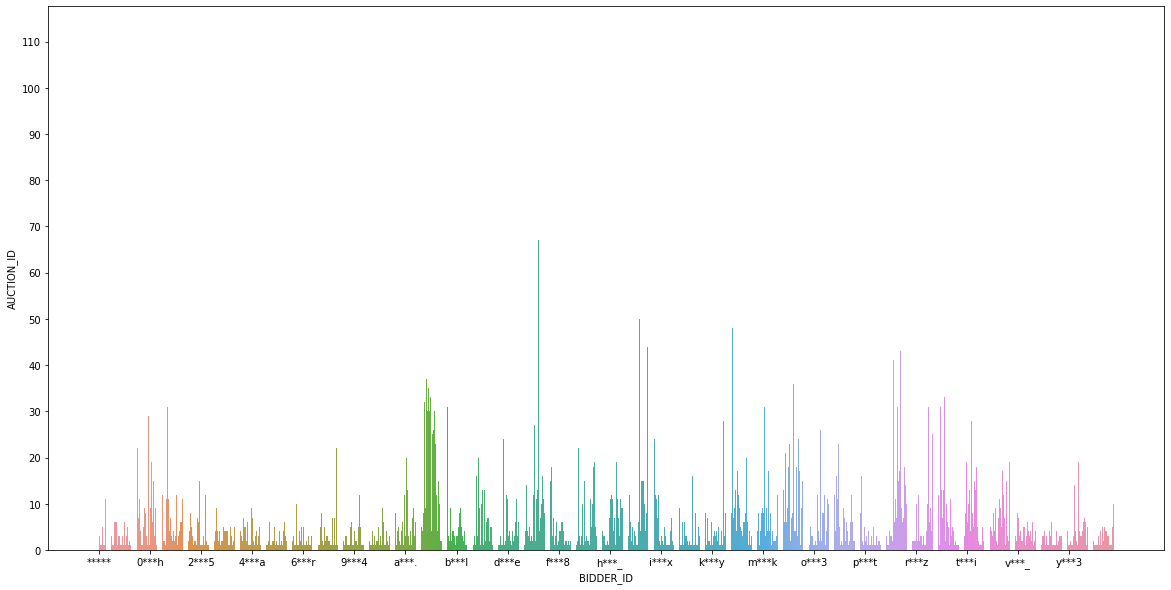

In [4]:
ids = data[['AUCTION_ID', 'BIDDER_ID']]

plt.figure(figsize=(20, 10))
ax = sns.countplot(data=ids, x='BIDDER_ID')
ax.set_ylabel('AUCTION_ID')
plt.locator_params(nbins=20)
plt.show()

Pode-se observar que de fato um `BIDDER_ID` efetuando lances em mais de um leilão. 

## Non-Graphical EDA

Segundo o site em que está o dataset, não devemos encontrar nenhum missing value nele. Ainda assim, a verificação será feita. 

In [5]:
print(data.isnull().sum())

RECORD_ID                 0
AUCTION_ID                0
BIDDER_ID                 0
BIDDER_TENDENCY           0
BIDDING_RATIO             0
SUCCESSIVE_OUTBIDDING     0
LAST_BIDDING              0
AUCTION_BIDS              0
AUCTION_STARTING_PRICE    0
EARLY_BIDDING             0
WINNING_RATIO             0
AUCTION_DURATION          0
CLASS                     0
dtype: int64


Confirmamos, então, que o dataset não possui missing values. Em seguida, vamos verificar o balanceamento entre as classes. Como os outros atributos categóricos são os IDs, não faremos esse tipo de análise para eles, mas já se mostrou que um `BIDDER_ID` pode estar em mais de um leilão.

In [6]:
g = data['CLASS']
pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)], axis=1, keys=('Frequência','Porcentagem'))

,Frequência,Porcentagem
0,5646,89.32131
1,675,10.67869


Vemos então um forte desbalanceamento para a classe 0, que é a classe de quase `90%` dos casos, que são as instâncias que não são fraude. Um desbalanceamento favorecendo a classe das não-fraudes era esperado, já que as fraudes seriam as minorias dentro do dataset.

Em seguida, queremos informações sobre como está a distribuição das variáveis contínuas:

In [7]:
data.describe()

,BIDDER_TENDENCY,BIDDING_RATIO,SUCCESSIVE_OUTBIDDING,LAST_BIDDING,AUCTION_BIDS,AUCTION_STARTING_PRICE,EARLY_BIDDING,WINNING_RATIO,AUCTION_DURATION
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000


Podemos ver que o desvio padrão é, em geral, considerável em relação à média dos atributos. Então devemos esperar valores relativamente dispersos para os atributos.

## Graphical EDA

O desbalanceamento severo da classe de shill bidders é representado pelo seguinte gráfico. 

<AxesSubplot:xlabel='CLASS', ylabel='count'>

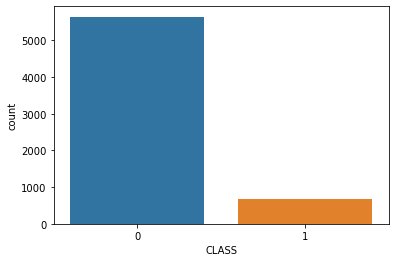

In [8]:
sns.countplot(data=data, x='CLASS')

 No gráfico a seguir vemos evidências de um enviesamento para as estremindades por parte dos atributos contínuos. Não só isso como  pode-se observar um alto grau de correlação entre alguns pares de atributos, tais como `EARLY_BIDDING` e `LAST_BIDDING`, ou `WINNING_RATIO` e `BIDDING_RATIO`. 

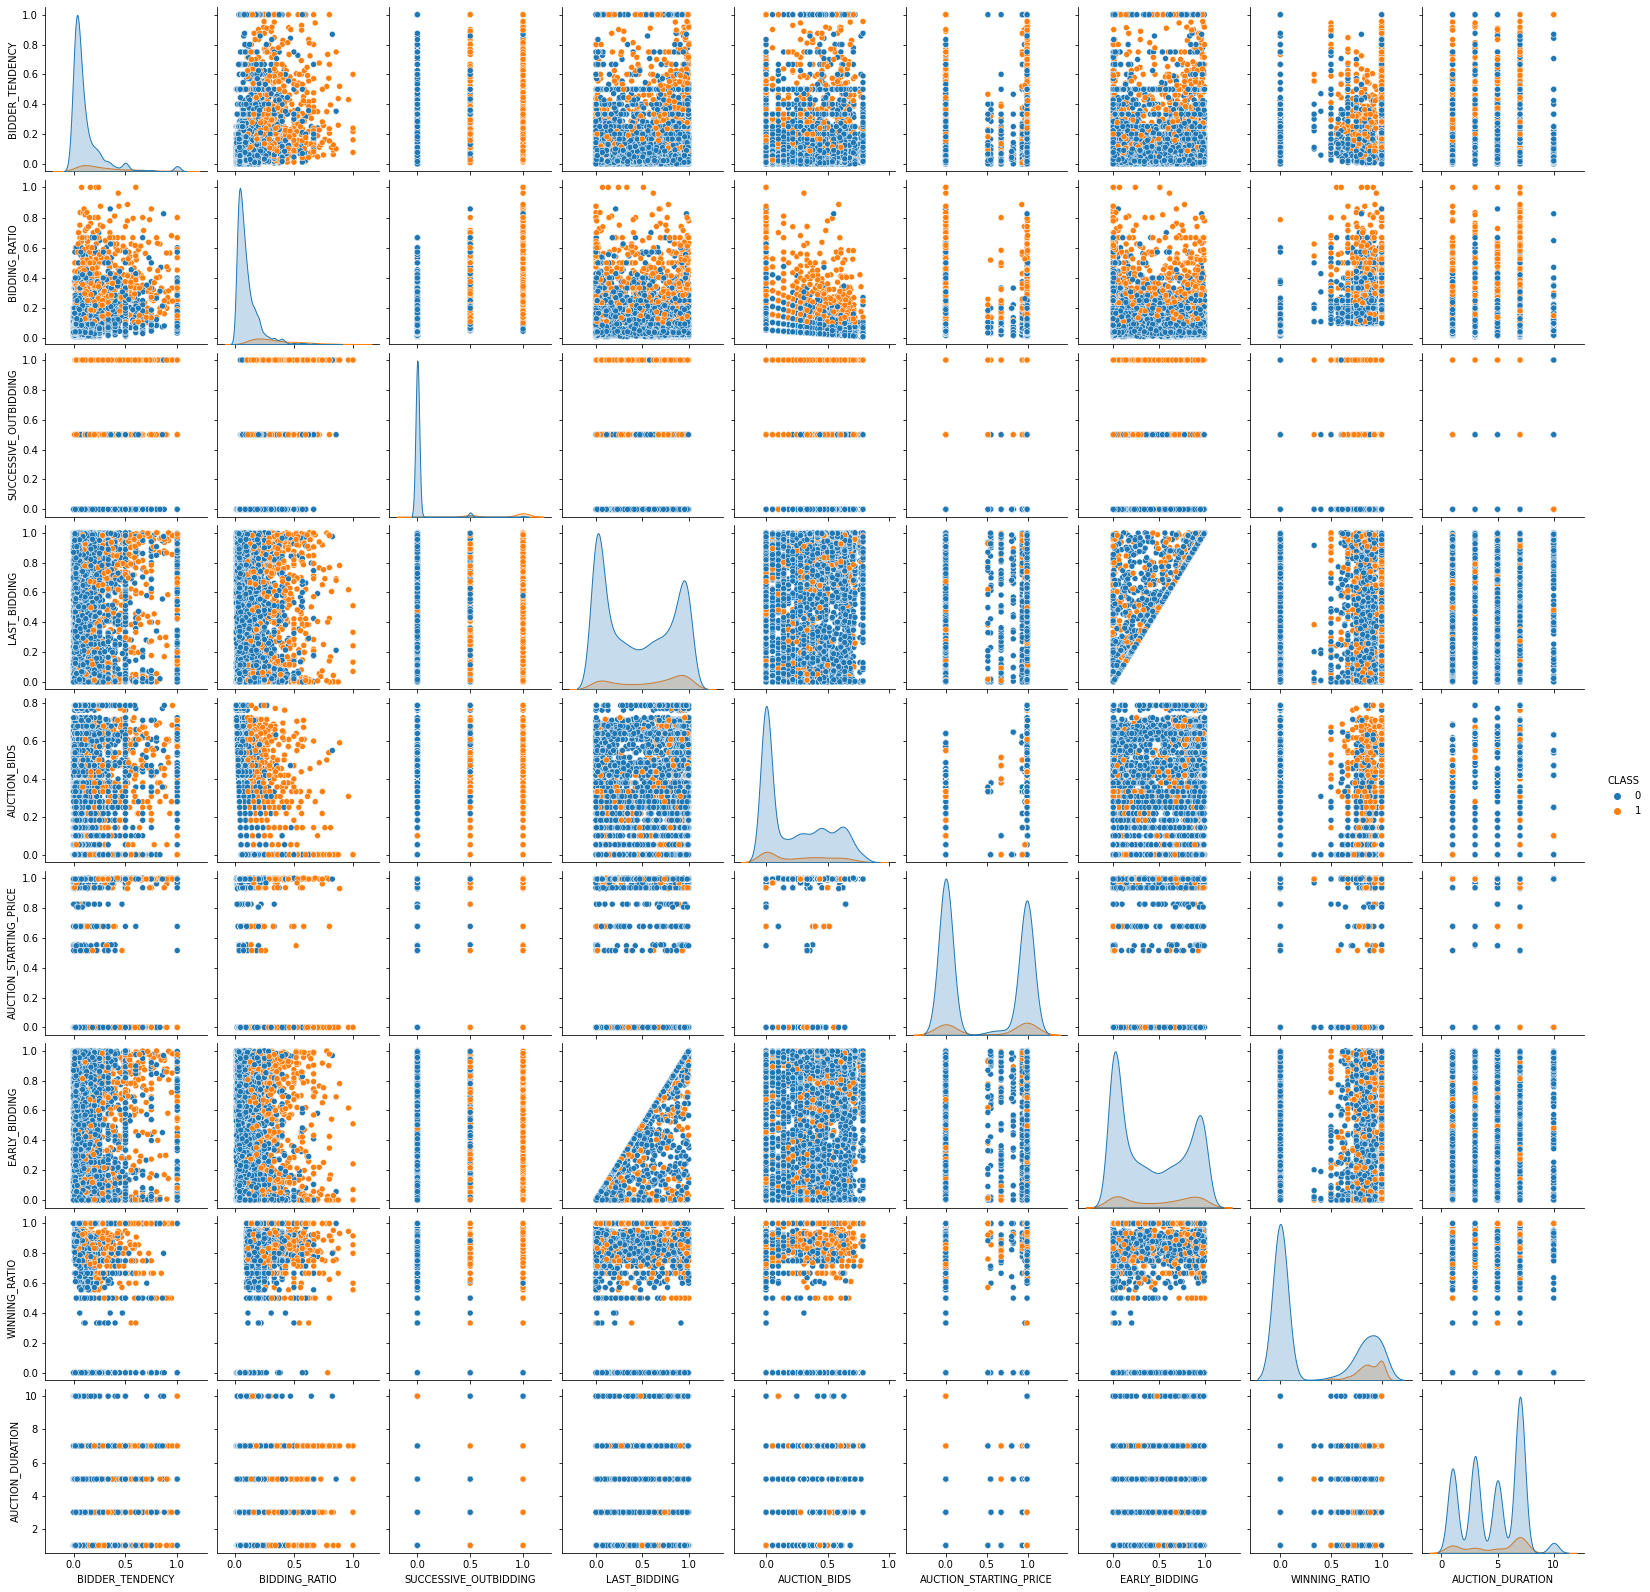

In [9]:
sns.pairplot(data, hue='CLASS')

O mapa de calor a seguir confirma as evidências de alta correlação entre pares de variáveis. Havendo correlação acima de `0.5` para quatro pares de atributos: `BIDDING_RATIO` e `SUCESSIVE_OUTBIDDING`; `BIDDING_RATIO` e `WINNING_RATIO`; `LAST_BIDDING` e `EARLY_BIDDING`; `AUCTION_BIDS` e `AUCTION_STARTING_PRICE`. Para o 2º e 3º par também verificamos que existia uma correlação no gráfico anterior. 

<AxesSubplot:>

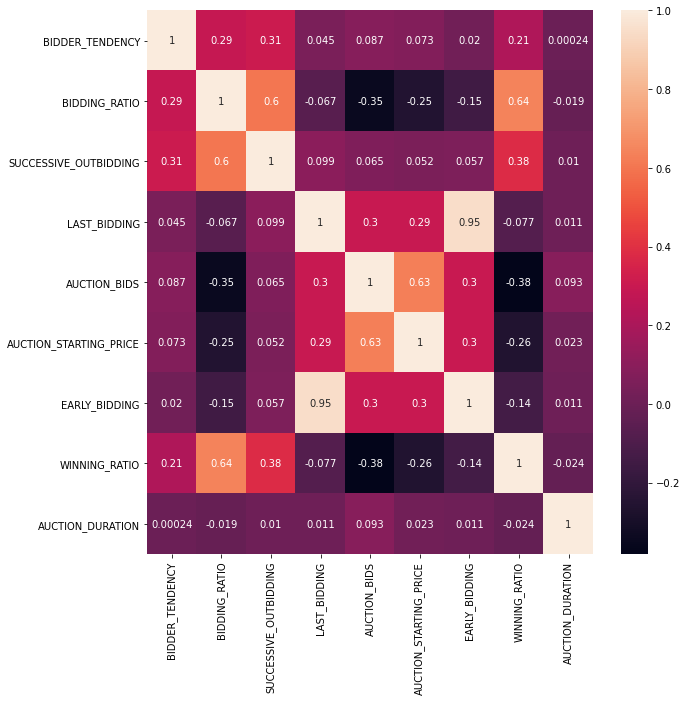

In [10]:
correlations = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True)

No gráfico a seguir, pode-se observar que as instâncias classificadas como sendo suspeita de _Shill Bidding_ tem um enviesamento semelhante a de instâncias classificadas como não suspeitas, exceto pelo caso em `SUCCESSICE_OUTBIDDING` pois _Shill Bidders_ de fato tendem a superar os próprios lances de maneira sucessiva. E `WINNING_RATIO`, o que faz sentido dado que _Shill Bidders_ tendem a perder mais leilões de forma proposital.

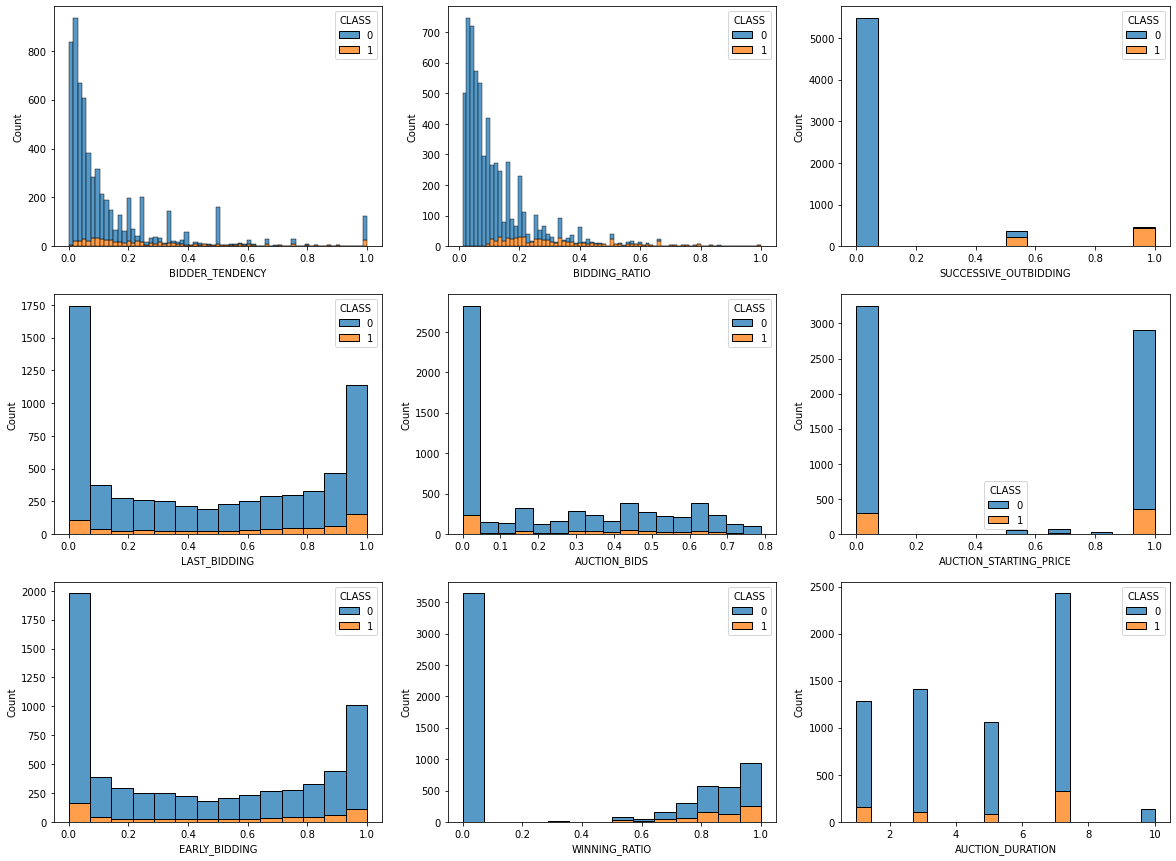

In [11]:
atributes = [['BIDDER_TENDENCY', 'BIDDING_RATIO', 'SUCCESSIVE_OUTBIDDING'], 
             ['LAST_BIDDING', 'AUCTION_BIDS', 'AUCTION_STARTING_PRICE'], 
             ['EARLY_BIDDING', 'WINNING_RATIO', 'AUCTION_DURATION']]
fig, axes = plt.subplots(3,3, figsize=(20, 15))
for ax_row, attr_row in zip(axes, atributes): 
  for ax, attr in zip(ax_row, attr_row):
    sns.histplot(data, x=attr, ax=ax, hue='CLASS', multiple='stack')

A seguir, usamos um boxplot para analisar a ditribuição de valores por classe é parecida para a maioria dos atributos, mas significativamente diferente para alguns atributos como `BIDDER_TENDENCY`, `BIDDING_RATIO`, `SUCESSIVE_OUTBIDDING`, `WINNING_RATIO`, em que os dois últimos atributos citados são os que possuem as maiores diferenças nas distribuições de valores por classes.

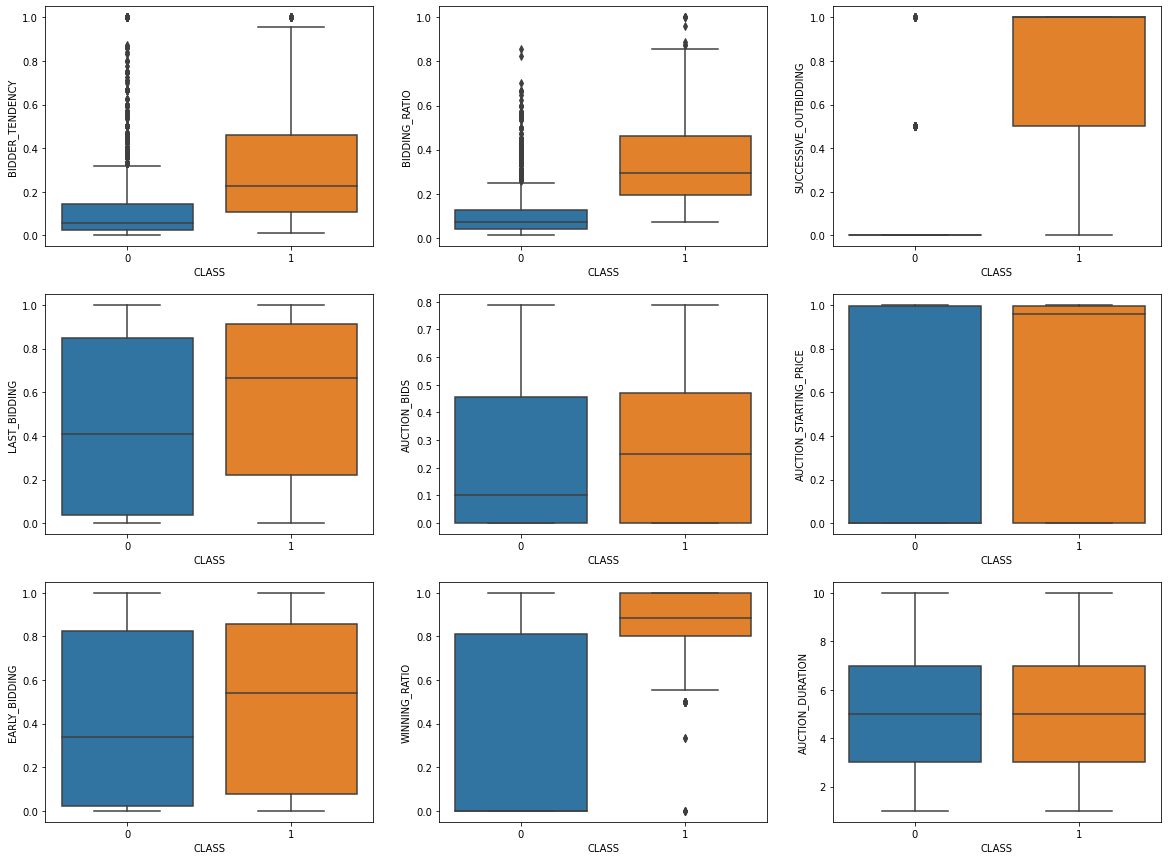

In [12]:
atributes = [['BIDDER_TENDENCY', 'BIDDING_RATIO', 'SUCCESSIVE_OUTBIDDING'], 
             ['LAST_BIDDING', 'AUCTION_BIDS', 'AUCTION_STARTING_PRICE'], 
             ['EARLY_BIDDING', 'WINNING_RATIO', 'AUCTION_DURATION']]
fig, axes = plt.subplots(3,3, figsize=(20, 15))
for ax_row, attr_row in zip(axes, atributes): 
  for ax, attr in zip(ax_row, attr_row):
    sns.boxplot(data=data, x='CLASS', y=attr, ax=ax)

Com o gráfico a seguir é mais simples visualisar o enviesamento de dados por classe. Pode-se perceber que as maiores diferenças de enviesamento para as instâncias definidas como suspeitas de _Shill Bidding_ estão nos atributos `SUCCESSIVE_OUTBIDDING` e `WINNING_RATIO`, observando os gráficos de distribuição. `BIDDER_TENDENCY` e `BIDDING_RATIO` também possuem diferenças de enviesamento notáveis, embora menores. A análise desse gráfico também está em perfeita concordância com a análise do gráfico anterior a esse (Boxplot dos valores do atributo para cada classe)

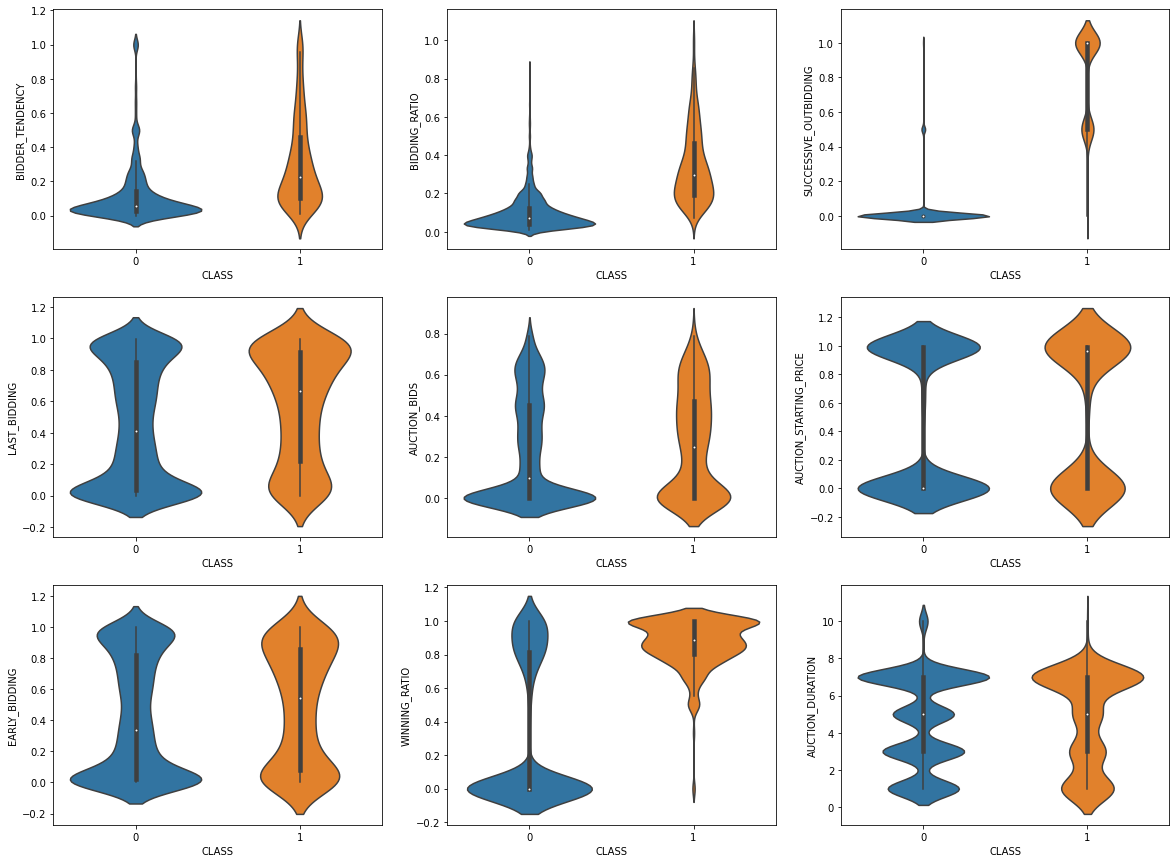

In [13]:
atributes = [['BIDDER_TENDENCY', 'BIDDING_RATIO', 'SUCCESSIVE_OUTBIDDING'],
             ['LAST_BIDDING', 'AUCTION_BIDS', 'AUCTION_STARTING_PRICE'],
             ['EARLY_BIDDING', 'WINNING_RATIO', 'AUCTION_DURATION']]
fig, axes = plt.subplots(3,3, figsize=(20, 15))
for ax_row, attr_row in zip(axes, atributes):
  for ax, attr in zip(ax_row, attr_row):
    sns.violinplot(data=data, x='CLASS', y=attr, ax=ax)

Vemos então que olhando para os atributos `BIDDER_TENDENCY`, `BIDDING_RATIO`, `SUCESSIVE_OUTBIDDING`, `WINNING_RATIO`, conseguimos observar uma boa separação entre as classes 

# Preparação dos dados


**Entrega 4:** Adicionamos um comentário no final sobre o oversampling

**Em relação a valores faltantes:**

Como mencionado anteriormente, a base de dados coletada não possui valores faltantes em nenhum de seus atributos, portanto nenhum tratamento neste campo será necessário. 

## Lidando com os atributos identificadores

Além do atributo `RECORD_ID` o qual trata-se do atributo identificador da instância de dados, a base também contém atributos itentificadores de leilões e usuários que efetuam os lançes, `AUCTION_ID` e `BIDDER_ID` respectivamente. 
Foi evidenciado que o número de leilões `AUCTION_ID` de um mesmo usuário, varia dependendo do seu `BIDDER_ID`, em que para alguns `BIDDER_ID`, temos uma participação em mais leilões do que outros. No gráfico abaixo, vemos o número de leilões (eixo y) em que cada usuário (`BIDDER_ID`, eixo x) participou.

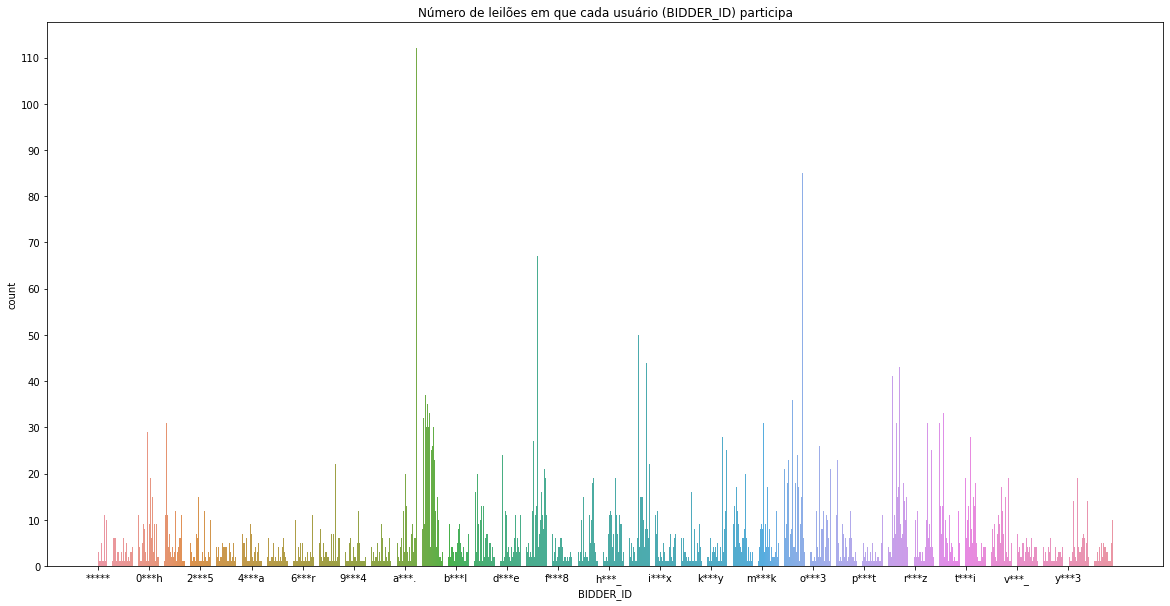

In [14]:
ids = data[['AUCTION_ID', 'BIDDER_ID']]

plt.figure(figsize=(20, 10))
ax = sns.countplot(data=ids, x='BIDDER_ID')
ax.set_title('Número de leilões em que cada usuário (BIDDER_ID) participa')
plt.locator_params(nbins=20)
plt.show()

Como não é explicitada uma relação de ordem das instâncias com os valores dos atributos, _Label Encoding_ não é adequado para o processamento dos atributos.
Existe a possibilidade de se utilizar _One-Hot Encoding_, porém exitem duas contrapartidas ao se utilisar este método. Primeiramente, existem muitos valores únicos tanto em `AUCTION_ID`  quanto em `BIDDER_ID`, onde ao aplicar _One-Hot Encoding_ causaria os problemas relacionados a dimensionalidade dos dados. A segunda contrapartida está relacionada ao fato de que com o tempo o número de leilões e usuários cadastrados pode a aumentar, tornando a utilização de tais atributos pouco prática. Sendo assim a equipe optou por remover todos os atributos identificadores `RECORD_ID`, `AUCTION_ID` e `BIDDER_ID`.
Não existe mais de um registro com o mesmo par de `BIDDER_ID` e `AUCTION_ID`, já que os atributos se referem ao comportamento do bidder, em geral, ou a certas características do leilão em si. Então, não vão existir registros diferentes com o mesmo `BIDDER_ID` e `AUCTION_ID`. Portanto, removê-los não causará perda de informação significante.

In [15]:
def remove_features(data_frame, feature_labels):

  feature_labels = [feature_labels] if feature_labels is not list else feature_labels

  # Removendo features
  for feature_label in feature_labels:
    data_frame = data_frame.drop(feature_label, axis=1)

  return data_frame


data_baseline = remove_features(data, ['RECORD_ID', 'AUCTION_ID', 'BIDDER_ID'])

In [ ]:
data_baseline.sample(5)

,BIDDER_TENDENCY,BIDDING_RATIO,SUCCESSIVE_OUTBIDDING,LAST_BIDDING,AUCTION_BIDS,AUCTION_STARTING_PRICE,EARLY_BIDDING,WINNING_RATIO,AUCTION_DURATION,CLASS
326,0.045455,0.166667,0.0,0.616032,0.000000,0.000000,0.616032,1.000000,5,0
5621,0.076923,0.111111,0.0,0.954444,0.000000,0.000000,0.646470,0.769231,1,0
5080,0.500000,0.039216,0.0,0.434745,0.647059,0.993593,0.409780,0.000000,3,0
3351,0.058824,0.071429,0.0,0.228241,0.000000,0.000000,0.228241,0.000000,3,0
3938,0.055556,0.090909,0.0,0.000081,0.000000,0.000000,0.000081,0.000000,1,0


## Train-test Split e Normalização

**Divisão entre treino e teste**:

Antes de fazermos a normalização dos dados, devemos dividir os dados em conjunto de treino e conjunto de teste, para evitar que com a preparação dos dados haja vazamento de informação do conjunto de teste para o de treino. 

In [16]:
from sklearn.model_selection import train_test_split
X = data_baseline.iloc[:, :-1].values
y = data_baseline.iloc[:, -1].values

X_id_removed_train, X_id_removed_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

data_baseline_train = pd.DataFrame(X_id_removed_train, columns=COLUMN_NAMES[3:-1])

data_baseline_test = pd.DataFrame(X_id_removed_test, columns=COLUMN_NAMES[3:-1])

In [17]:
data_baseline_train.sample(5)

,BIDDER_TENDENCY,BIDDING_RATIO,SUCCESSIVE_OUTBIDDING,LAST_BIDDING,AUCTION_BIDS,AUCTION_STARTING_PRICE,EARLY_BIDDING,WINNING_RATIO,AUCTION_DURATION
3504,0.100000,0.028571,0.0,0.629630,0.485714,0.993528,0.629630,0.000000,1.0
2740,0.040000,0.027778,0.0,0.848775,0.500000,0.987121,0.848775,0.000000,7.0
954,0.461538,0.272727,1.0,0.570806,0.181818,0.000000,0.570806,1.000000,5.0
1928,0.056604,0.125000,0.0,0.008928,0.250000,0.999935,0.008914,0.857143,10.0
1622,0.115385,0.076923,0.0,0.039472,0.538462,0.999353,0.039456,0.000000,5.0


**Normalização**:

Os gráficos exibidos nas sessões de EDA evidenciam que os dados de todos os atributos contínuos não seguem uma tendência aproximadamente normal, que seria o caso para utilizarmos a normalização standard. Portanto consideraremos a normalização Min-Max como a mais adequada para o pré-processamento dos dados.

In [18]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_baseline_train = pd.DataFrame(min_max_scaler.fit_transform(data_baseline_train), columns=data_baseline_train.columns)
data_baseline_test = pd.DataFrame(min_max_scaler.fit_transform(data_baseline_test), columns=data_baseline_test.columns)

In [ ]:
data_baseline_train.sample(5)

,BIDDER_TENDENCY,BIDDING_RATIO,SUCCESSIVE_OUTBIDDING,LAST_BIDDING,AUCTION_BIDS,AUCTION_STARTING_PRICE,EARLY_BIDDING,WINNING_RATIO,AUCTION_DURATION
642,0.051282,0.100529,0.0,0.690250,0.000000,0.000000,0.159794,1.0,0.666667
464,0.030612,0.054089,0.5,0.489507,0.772226,0.993657,0.489185,0.0,0.000000
599,0.066667,0.044312,0.0,0.605093,0.000000,0.000000,0.605110,0.0,0.666667
803,0.038462,0.060374,0.0,0.671299,0.000000,0.967768,0.671317,0.0,0.666667
2575,0.142857,0.051339,0.0,0.006274,0.000000,0.000000,0.006274,0.0,0.444444


##Redução de dimensionalidade

Durante a _EDA_ foi evidenciado que existe um alto grau de correlação entre certos pares de atributos, havendo até quatro pares de atributos com correlação acima de $0.5$. Não só isso como também uma diferença notável de enviesamento por classe dos valores dos atributos `SUCCESSIVE_OUTBIDDING`, `WINNING_RATIO`, `BIDDER_TENDENCY` e `BIDDING_RATIO`.
Então, como estratégia de remoção de atributos optamos por utilizar tanto _Principal Component Analysis_ (PCA), e a remoção manual de todos os outros atribubits exceto `SUCCESSIVE_OUTBIDDING`, `WINNING_RATIO`, `BIDDER_TENDENCY` e `BIDDING_RATIO`, já que esses são os atributos em que a separação de classes é mais évidente.

### Remoção Manual de Atributos

Aqui, nós fazemos a remoção manual de todos os atributos, deixando apenas os `SUCCESSIVE_OUTBIDDING`, `WINNING_RATIO`, `BIDDER_TENDENCY` e `BIDDING_RATIO`.

In [19]:
data_manual_train = remove_features(data_baseline_train, ['LAST_BIDDING', 'AUCTION_BIDS', 'AUCTION_STARTING_PRICE', 'EARLY_BIDDING', 'AUCTION_DURATION'])
data_manual_test = remove_features(data_baseline_test, ['LAST_BIDDING', 'AUCTION_BIDS', 'AUCTION_STARTING_PRICE', 'EARLY_BIDDING', 'AUCTION_DURATION'])

In [20]:
data_manual_train.sample(5)

,BIDDER_TENDENCY,BIDDING_RATIO,SUCCESSIVE_OUTBIDDING,WINNING_RATIO
2810,0.012987,0.190476,0.0,0.774194
1130,0.070175,0.566327,0.5,0.793103
895,0.025641,0.089286,0.0,0.846154
223,0.050000,0.017007,0.0,0.000000
492,0.018868,0.072421,0.0,0.000000


### Principal Component Analysis (PCA)

Agora, utilizaremos o PCA para reduzir a dimensionalidade.

In [21]:
from sklearn.decomposition import PCA
#verificadr o código
pca = PCA(n_components=6)
data_pca_train = pca.fit_transform(data_baseline_train)
data_pca_test = pca.fit_transform(data_baseline_test)
data_pca_train = pd.DataFrame(data_pca_train)
data_pca_test = pd.DataFrame(data_pca_test)

In [22]:
data_pca_test.sample(5)

,0,1,2,3,4,5
583,-0.972494,0.095151,0.197441,-0.418204,-0.095406,0.204741
638,0.310199,-0.867359,0.430441,-0.363101,0.252883,0.257988
1191,1.010593,-0.104188,-0.061187,0.271595,-0.019673,0.218743
1018,1.108444,-0.034665,-0.100718,0.280653,-0.010449,0.261637
1150,-0.146615,-0.080625,0.976174,-0.020537,-0.179191,0.256751


Na próxima etapa iremos fazer os testes/avaliações tanto para o dataset em que usamos o PCA, como no que usamos a remoção manual dos atributos. Também testaremos com um dataset baseline, em que não fazemos nenhuma redução de dimensionalidade, para comparação e observar o efeito da redução de dimensionalidade na performance.

## Balanceamento do dataset - Oversampling

Como o dataset é desbalanceados, podemos recorrer ao Oversampling. Na parte de Variação paramétrica dos modelos, na metodologia da avaliação, nós adicionamos um parâmetros para aplicar o oversampling, caso necessário

# Variação paramétrica dos modelos


## Metodologia da avaliação

Agora, nós iremos fazer variações paramétricas para conseguirmos os melhores resultados para diferentes modelos. Escolhemos testar para os modelos de Árvore de Decisão, KNN, LVQ, SVM e MLP. Faremos a busca paramétrica para cada uma das bases de dados. Na busca paramétrica, podemos fornercer como argumento um booleano que indicará se vai haver oversampling ou não.

Para os algoritmos mais baratos computacionalmente, a Decision Tree e o KNN, utilizamos o Grid Search, pois é possível rodar todo o dicionário de parâmetros sem grandes custos computacionais. Já para algoritmos mais pesados (Todos os outros), utilizamos o random search. Ao fim, nós imprimimos a acurácia média e desvio padrão do CV, isto é, a média das acurácias de cada a split do StratifiedKFold e o desvio padrão delas; A acurácia do modelo; E, imprimimos os melhores parâmetros para o modelo.

In [ ]:
!pip install sklvq --quiet

In [35]:
import copy
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklvq import GLVQ
from scipy import stats
from itertools import product
from warnings import filterwarnings

filterwarnings('ignore')

seed = 2022
rng = np.random.default_rng(seed)

def extract_split_accs_from_df(data_frame: pd.DataFrame, n_splits: int = 5): 
  split_accs = [] 

  for split_idx in range(n_splits): 
    score_value = data_frame[f'split{split_idx}_test_score'].values[0]
    split_accs.append(score_value)
  return np.array(split_accs)

def build_isolated_estimator(estimator_name: str, base_params: dict): 

  if estimator_name == 'LVQ':
    return GLVQ().set_params(**base_params)
  elif estimator_name == 'KNN':
    return KNeighborsClassifier().set_params(**base_params)
  elif estimator_name == 'SVM': 
    return SVC().set_params(**base_params)
  elif estimator_name == 'MLP':
    return MLPClassifier().set_params(**base_params)
  elif estimator_name == 'DTREE': 
    return DecisionTreeClassifier().set_params(**base_params)
  else: 
    raise Exception('Unmapped classifier')

def param_variation(
      model_definition,
      model_params,
      data,
      experiment_name='Model Name',
      search = 'random',
      n_iter=15,
      seed=2022):

  print('Definindo o tipo de cross-validation')
  cv = StratifiedKFold()

  print('Extraindo dados')

  X_train, Y_train, X_test, Y_test = data

  print(f'-- {experiment_name} --')

  if(search == 'grid'):
    search_model = GridSearchCV(
                      model_definition, 
                      model_params,
                      cv=cv,
                      scoring='accuracy',
                      n_jobs= 4
                  )
  if(search == 'random'):
    search_model = RandomizedSearchCV(
                      model_definition, 
                      model_params,
                      n_iter=n_iter,
                      cv=cv,
                      scoring='accuracy',
                      random_state=seed,
                      n_jobs =4
                  )

  print('Salvando resultados')
  search_model_result = search_model.fit(X_train, Y_train)

  report = {}

  search_cv_result = pd.DataFrame(search_model_result.cv_results_)
  search_best_results = search_cv_result[search_cv_result['params'] == search_model_result.best_params_]
  best_model_accs = extract_split_accs_from_df(search_best_results)

  print('Melhores resultados da busca:')
  print('Acurácia Média e Desvio Padrão do CV : %.2f (%.4f)' % (best_model_accs.mean(), best_model_accs.std()))
  print('Melhor acurácia: %.2f' % search_model_result.best_score_)
  print('Melhores parâmetros: %s' % search_model_result.best_params_)

  ## escrevendo report <<<
  report['mean_acc_cv'] = best_model_accs.mean()
  report['std_acc_cv'] = best_model_accs.std()
  report['best_acc'] = search_model_result.best_score_
  ##<<<<<<<<<<<<<<<<<<<<<<

  best_model = search_model_result.best_estimator_

  Y_test_preds = best_model.predict(X_test)
  fp_rate, tp_rate, _ = metrics.roc_curve(Y_test_preds, Y_test)
  
  train_full_acc_score = accuracy_score(best_model.predict(X_train),Y_train)
  test_acc_score = accuracy_score(Y_test_preds, Y_test)
  auc = metrics.auc(fp_rate, tp_rate)

  print("Acuracia de treinamento clf: %0.3f" %  train_full_acc_score)
  print("Acuracia de teste clf: %0.3f" % test_acc_score)
  print("Área sob a curva ROC (Test): %0.3f" % auc)
  ## escrevendo report <<<
  report['train_full_acc_score'] = train_full_acc_score
  report['test_acc_score'] = test_acc_score
  report['auc_score'] = auc
  report['cv_scores'] = best_model_accs
  ##<<<<<<<<<<<<<<<<<<<<<<

  print(metrics.classification_report(Y_test_preds, Y_test))

  print('\n\n')

  return best_model, report

In [36]:
datasets_report = {}
overall_report = {}

## Dicionário dos hiperparâmetros

A seguir, vamos realizar a variação parâmétrica para os diferentes datasets e diferentes modelos. Os dicionários de parâmetros foram definidos para cada combinação de modelo e dataset. Para alguns hiperparâmetros nós utilizamos os mesmos dicionários para todos os modelos, pois ou não tinham muitas opções (Como o `criterion` da Decision Tree) ou eles são valores contínuos, que aí nós já gerávamos uma lista de valores que seria representativa. Os que forem iguais para todos os datasets nós vamos especificar, já para os hiper-parâmetros que nós variamos para cada dataset, nós testamos em cada dataset diferentes possibilidades até chegar em uma que seria a melhor.

**Decision Tree**:


*   `max_depth`: Profundidade Máxima da árvore. O dicionário de parâmetros vai sempre ter como limite superior a profundidade máxima da árvore encontrada de acordo com o fit que é realizado antes da variação paramétrica.
*   `criterion`: Critério para medir a qualidade dos splits. Para todos os datasets, utilizamos os critérios de *gini* e *entropy*, independente do dataset.
*   `min_samples_leaf`: O número de samples que precisam estar no nó folha.
*   `min_samples_split`: O número mínimo de samples necessários para gerar um split.


**KNN**

*    `n_neighbors`: Número de Vizinhos
*    `metric`: A métrica usada para medir distâncias. Para todos os datasets  utilizamos as métricas *Euclidiana*, *Mahattan*, *Cosseno* e *Chebyshev*


**LVQ**
*    `prototype_n_per_class`: Número de protótipos por classe

**SVM**
*    `kernel`: O kernel do SVM, para todos os datasets, utilizamos as opções *linear*, *polinomial*, *rbf* e *sigmoidal*.
*    `C`: Parâmetro de regularização. Utilizamos o mesmo para todos os datasets.
*    `gamma`: Coeficiente do kernel, para os kernels *polinomial*, *rbf* e *sigmoidal*. 

**MLP**
*     `activation`: Função de ativação. Para todos os datasets, utilizamos as funções de ativação *logística*, *tanh* e *relu*. 
*     `beta_1`: Taxa de decaimento exponencial para estimativas dos vetores dos primeiro momentos. Deixamos o mesmo dicionário de valores para todos os modelos.
*     `beta_2`: Taxa de decaimento exponencial para estimativas dos vetores dos segundos momentos. Deixamos o mesmo dicionário de valores para todos os modelos.
*     `learning_rate_init`: Valor inicial da taxa de aprendizagem. Deixamos o mesmo dicionário de valores para todos os modelos.
*     `hidden_layer_sizes`: Tupla que representa as camadas e quantos neurônios existem em cada camada. Utilizamos os mesmos dicionários de valores para todos os modelos;











Para os modelos de ensemble, nós tentamos utilizar o mesmo dicionário de parâmetros que utilizamos para rodar os modelos isolados. Para alguns casos, o tempo de execução do algoritmo ficava bem alto, daí tivemos que reduzir as opções na variação dos hiperparâmetros.

Vamos a seguir rodar os modelos para cada dataset. Iremos salvar os resultados para no final comparar os modelos e as diferentes técnicas de pré-processamento (associadas a cada dataset)

## Base de dados Baseline

Primeiro, rodaremos os modelos para a Base de dados Baseline. Definimos o nosso dicionário de parâmetros conforme rodamos os modelos e achamos dicionários melhores

In [37]:
experiment_data_base = (data_baseline_train.values, y_train.codes,
                   data_baseline_test.values, y_test.codes)

#### Decision Tree

In [38]:
# Decision tree
print('Testando profundidade máxima do modelo Decision Tree: ')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train.values, y_train.codes)
print('Profundidade máxima: ',decision_tree.tree_.max_depth)
print('Executando experimentos')
tree_params = {
    'max_depth': list(range(4, decision_tree.tree_.max_depth+1)),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1, 6)),
    'min_samples_split': list(range(1, 6))
}
best_tree, report_dtree = param_variation(
                            decision_tree,
                            tree_params,
                            experiment_data_base,
                            experiment_name='Decision Tree',
                            search = 'grid',
                          )
report_dtree['oversampling'] = False
report_dtree['dataset'] = 'Baseline'
report_dtree['model'] = 'Decision Tree'

overall_report['Decision Tree'] = copy.deepcopy(report_dtree)
df = pd.DataFrame([report_dtree.values()], columns=report_dtree.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = True)
df

Testando profundidade máxima do modelo Decision Tree: 
Profundidade máxima:  10
Executando experimentos
Definindo o tipo de cross-validation
Extraindo dados
-- Decision Tree --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 1.00 (0.0016)
Melhor acurácia: 1.00
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.998
Área sob a curva ROC (Test): 0.993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       1.00      0.99      0.99       206

    accuracy                           1.00      1897
   macro avg       1.00      0.99      1.00      1897
weighted avg       1.00      1.00      1.00      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Baseline,Decision Tree,False,0.997739,0.001599,0.997739,0.999774,0.998419,0.992718,"[1.0, 0.9977401129943503, 0.9988700564971752, ..."


#### KNN

In [39]:
# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 6)),
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev']
}

best_knn, report_knn = param_variation(
                          knn,
                          knn_params,
                          experiment_data_base,
                          experiment_name='KNN',
                          search='grid'
                        )
report_knn['oversampling'] = False
report_knn['dataset'] = 'Baseline'
report_knn['model'] = 'KNN'

overall_report['KNN'] = copy.deepcopy(report_knn)
df = pd.DataFrame([report_knn.values()], columns=report_knn.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- KNN --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0019)
Melhor acurácia: 0.99
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 1}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.991
Área sob a curva ROC (Test): 0.970
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1687
           1       0.98      0.94      0.96       210

    accuracy                           0.99      1897
   macro avg       0.98      0.97      0.98      1897
weighted avg       0.99      0.99      0.99      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Baseline,KNN,False,0.991862,0.001945,0.991862,1.0,0.991038,0.969947,"[0.9943502824858758, 0.992090395480226, 0.9932..."


#### LVQ

In [40]:
# LVQ
lvq = GLVQ(random_state=seed)

lvq_params = {
  'prototype_n_per_class': list(range(1, 20,2))
}

best_lvq, report_lvq = param_variation(
                        lvq,
                        lvq_params,
                        experiment_data_base,
                        experiment_name='LVQ', 
                        seed=seed
                        )
report_lvq['oversampling'] = False
report_lvq['dataset'] = 'Baseline'
report_lvq['model'] = 'LVQ'

overall_report['LVQ'] = copy.deepcopy(report_lvq)
df = pd.DataFrame([report_lvq.values()], columns=report_lvq.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- LVQ --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.97 (0.0049)
Melhor acurácia: 0.97
Melhores parâmetros: {'prototype_n_per_class': 15}
Acuracia de treinamento clf: 0.966
Acuracia de teste clf: 0.962
Área sob a curva ROC (Test): 0.966
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1758
           1       0.67      0.97      0.79       139

    accuracy                           0.96      1897
   macro avg       0.83      0.97      0.88      1897
weighted avg       0.97      0.96      0.97      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Baseline,LVQ,False,0.967222,0.004917,0.967222,0.96632,0.962045,0.966271,"[0.9672316384180791, 0.9694915254237289, 0.972..."


#### SVM

In [ ]:
# SVM 
svm = SVC(random_state=seed)

svm_params = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
  'C': np.linspace(0.1, 1, 15).tolist() + np.linspace(1,1000, 15).tolist(),
  'gamma': ['scale', 'auto'] + np.power(np.linspace(0.1,2, 15), 2).tolist()
}

best_svm, report_svm = param_variation(
                          svm,
                          svm_params,
                          experiment_data_base,
                          experiment_name='SVM',
                          seed=seed
                        )
report_svm['oversampling'] = False
report_svm['dataset'] = 'Baseline'
report_svm['model'] = 'SVM'

overall_report['SVM'] = copy.deepcopy(report_svm)
df = pd.DataFrame([report_svm.values()], columns=report_svm.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- SVM --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0027)
Melhor acurácia: 0.99
Melhores parâmetros: {'kernel': 'poly', 'gamma': 2.53719387755102, 'C': 0.8071428571428572}
Acuracia de treinamento clf: 0.996
Acuracia de teste clf: 0.991
Área sob a curva ROC (Test): 0.964
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1682
           1       0.99      0.93      0.96       215

    accuracy                           0.99      1897
   macro avg       0.99      0.96      0.98      1897
weighted avg       0.99      0.99      0.99      1897






,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
0,0.992541,0.002731,0.992541,0.996383,0.990511,0.964224,False


#### MLP

Para a MLP, escolhemos as funções de ativação *logística*, *tanh* e *relu*. Para beta_1, beta_2 e learning_rate_init fizemos uma distribuição linear. Já para camadas e neurônios por camadas, fizemos um máximo de 3 camadas e um máximo de 20 neurônios por camada. Para a MLP também fizemos Random Search

In [41]:
# MLP
mlp = MLPClassifier(
          max_iter=500,
          solver='adam',
          early_stopping=True,
          random_state=seed)

layer_configuration = []
layers_max_range = 3
neurons_max_range = 21
for n_hidden in range(1, layers_max_range+1):
    for n_neurons in range(5, neurons_max_range, 5):
      layer_conf = tuple([np.random.randint(4, n_neurons) for _ in range(n_hidden)])
      layer_configuration.append(layer_conf)

mlp_params = {
    'activation': ['logistic', 'tanh', 'relu'],
    'beta_1': np.linspace(.01, .9, 15).tolist(),
    'beta_2': np.linspace(.01, .9, 15).tolist(),
    'learning_rate_init': np.linspace(.001, .9, 15).tolist(),
    'hidden_layer_sizes': layer_configuration 
  }

best_mlp, report_mlp = param_variation(
                        mlp,
                        mlp_params,
                        experiment_data_base,
                        experiment_name='MLP',
                        seed=seed
                      )
report_mlp['oversampling'] = False
report_mlp['dataset'] = 'Baseline'
report_mlp['model'] = 'MLP'

overall_report['MLP'] = copy.deepcopy(report_mlp)
df = pd.DataFrame([report_mlp.values()], columns=report_mlp.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- MLP --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0061)
Melhor acurácia: 0.98
Melhores parâmetros: {'learning_rate_init': 0.5789285714285713, 'hidden_layer_sizes': (9,), 'beta_2': 0.7728571428571429, 'beta_1': 0.455, 'activation': 'tanh'}
Acuracia de treinamento clf: 0.994
Acuracia de teste clf: 0.992
Área sob a curva ROC (Test): 0.980
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1696
           1       0.96      0.97      0.96       201

    accuracy                           0.99      1897
   macro avg       0.98      0.98      0.98      1897
weighted avg       0.99      0.99      0.99      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Baseline,MLP,False,0.982141,0.00613,0.982141,0.994123,0.991566,0.979934,"[0.9796610169491525, 0.992090395480226, 0.9796..."


#### Ensemble - Bagging

In [42]:
n_estimators_list = list(range(10, 21, 5))
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train.values, y_train.codes)


rforest_params = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': n_estimators_list,
    'max_depth':list(range(4, decision_tree.tree_.max_depth+1)),
}

rforest = RandomForestClassifier(n_estimators=10, criterion='gini')
best_rforest = param_variation(
                rforest,
                rforest_params,
                experiment_data_base,
                experiment_name='Random Forest',
                seed=seed,
                search='grid'
              )

'''
layer_configuration = []
layers_max_range = 3
neurons_max_range = 21
for n_hidden in range(1, layers_max_range+1):
    for n_neurons in range(5, neurons_max_range, 5):
      layer_conf = tuple([np.random.randint(4, n_neurons) for _ in range(n_hidden)])
      layer_configuration.append(layer_conf)
'''

models = [
  ('LVQ', 
    {
      'n_estimators': n_estimators_list, 
      'base_estimator': [GLVQ(prototype_n_per_class=n_prots, random_state=seed) for n_prots in range(1,6,2)]
     }
  ),
  ('KNN', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [KNeighborsClassifier(n_neighbors=n_neighbors) for n_neighbors in range(1, 6)]
     }
  ),
  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
  ),
  ('MLP', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [ MLPClassifier(
                            hidden_layer_sizes=(n_neurons,),
                            max_iter=200,
                            random_state=seed) for n_neurons in range(5, 21, 5) ]
    }
  )
]

for model_name, bagging_params in models:

  print('--------------------------------------------------')
  print(f'\t Processando {model_name}')
  print('--------------------------------------------------')
  print('Instanciando bagging')

  bagging = BaggingClassifier(bagging_params['base_estimator'][0], n_estimators=15, random_state=seed)

  search_type = 'grid'if model_name == 'KNN' else 'random'

  best_baging, report_bagging = param_variation(
                                  bagging,
                                  bagging_params,
                                  experiment_data_base,
                                  experiment_name=f'Bagging {model_name}',
                                  seed=seed,
                                  search=search_type
                                )
  report_bagging['oversampling'] = False
  report_bagging['dataset'] = 'Baseline'
  report_bagging['model'] = f'Bagging {model_name}'
  overall_report[f'Bagging {model_name}'] = copy.deepcopy(report_bagging)
  df = pd.DataFrame([report_bagging.values()], columns=report_bagging.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Random Forest --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0013)
Melhor acurácia: 0.99
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.995
Área sob a curva ROC (Test): 0.978
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1686
           1       1.00      0.96      0.98       211

    accuracy                           0.99      1897
   macro avg       0.99      0.98      0.99      1897
weighted avg       0.99      0.99      0.99      1897




--------------------------------------------------
	 Processando LVQ
--------------------------------------------------
Instanciando bagging
Definindo o tipo de cross-validation
Extraindo dados
-- Bagging LVQ --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padr

#### Ensemble - Boosting

In [43]:
n_estimators_list = list(range(10, 21, 5))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train.values, y_train.codes)

models = [
  ('DTREE', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth=depth, random_state=seed) for depth in  range(4, decision_tree.tree_.max_depth+1) ]
    }
   ),

  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
   )
]




for model_name, boosting_params in models:
  
  boosting = AdaBoostClassifier(
                base_estimator=boosting_params['base_estimator'][0],
                n_estimators=5,
                algorithm='SAMME',
                random_state=seed)

  best_boosting, report_boosting = param_variation(
                                    boosting,
                                    boosting_params,
                                    experiment_data_base,
                                    experiment_name=f'Boosting {model_name}',
                                    seed=seed
                                    )
  report_boosting['oversampling'] = False
  report_boosting['dataset'] = 'Baseline'
  report_boosting['model'] = f'Boosting {model_name}'
  overall_report[f'Boosting {model_name}'] = copy.deepcopy(report_boosting)
  df = pd.DataFrame([report_boosting.values()], columns=report_boosting.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Boosting DTREE --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 1.00 (0.0013)
Melhor acurácia: 1.00
Melhores parâmetros: {'n_estimators': 20, 'base_estimator': DecisionTreeClassifier(max_depth=10, random_state=2022)}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.998
Área sob a curva ROC (Test): 0.993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       1.00      0.99      0.99       206

    accuracy                           1.00      1897
   macro avg       1.00      0.99      1.00      1897
weighted avg       1.00      1.00      1.00      1897




Definindo o tipo de cross-validation
Extraindo dados
-- Boosting SVM --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.89 (0.0005)
Melhor acurácia: 0.89
Melhores parâmetros: {'n_estimators': 10, 'base_estimator'

#### Ensemble - Stacking (pendente)

E agora o Stacking, mas esse só foi executaod para Árvore de Decisão, já que ele é muito custoso.

In [44]:
# variando parâmetros decision tree
criterion_list = ['entropy', 'gini']
max_depth_range = list(range(4, decision_tree.tree_.max_depth+1))
decision_tree_params = list(product(criterion_list, max_depth_range))

# variando parâmetros lvq
n_prototypes_list = list(range(1, 6, 2))


# variando parâmetros knn
n_neighbors = list(range(1, 6))

# Variando svms
svm_kernels = ['linear', 'rbf', 'poply', 'sigmoid']

# Variando MLP
n_hidden_neurons = list(range(5, 21,5))

params_variation = product(
                    decision_tree_params, 
                    n_prototypes_list, 
                    n_neighbors, 
                    svm_kernels, 
                    n_hidden_neurons)

print('Instanciando variação de modelos')
models = []
for params in params_variation:
  models.append([
            ('DTREE', DecisionTreeClassifier(
                                criterion=params[0][0], max_depth=params[0][1], random_state=seed)),
            ('LVQ', GLVQ(prototype_n_per_class=params[1],random_state=seed)),
            ('KNN', KNeighborsClassifier(n_neighbors=params[2])),
            ('SVM', SVC(kernel=params[3], random_state=seed)),
            ('MLP', MLPClassifier(
              hidden_layer_sizes=(params[4],),
              max_iter=200,
              random_state=seed))       
  ])

names_list = []
res_list   = []

print('Instanciando classificador Stacking')
stacking_params = {'estimators': models}
stacking = StackingClassifier(estimators=models[0], cv=5)

best_stacking, report_stacking = param_variation(
                                  stacking,
                                  stacking_params,
                                  experiment_data_base,
                                  experiment_name='Stacking Classifier',
                                  seed=seed,
                                  search=search_type
                                 )
report_stacking['oversampling'] = False
report_stacking['dataset'] = 'Baseline'
report_stacking['model'] = f'Stacking {model_name}'
overall_report[f'Stacking {model_name}'] = copy.deepcopy(report_stacking)
df = pd.DataFrame([report_stacking.values()], columns=report_stacking.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Instanciando variação de modelos
Instanciando classificador Stacking
Definindo o tipo de cross-validation
Extraindo dados
-- Stacking Classifier --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 1.00 (0.0006)
Melhor acurácia: 1.00
Melhores parâmetros: {'estimators': [('DTREE', DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=2022)), ('LVQ', GLVQ(random_state=2022)), ('KNN', KNeighborsClassifier(n_neighbors=3)), ('SVM', SVC(kernel='sigmoid', random_state=2022)), ('MLP', MLPClassifier(hidden_layer_sizes=(5,), random_state=2022))]}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.997
Área sob a curva ROC (Test): 0.988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.98      0.99       207

    accuracy                           1.00      1897
   macro avg       1.00      0.99      0.99      1897
weighted avg       1.00      1.

,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Baseline,Stacking SVM,False,0.997287,0.000554,0.997287,1.0,0.996837,0.987627,"[0.9977401129943503, 0.9977401129943503, 0.996..."


#### Relatório geral

In [45]:
datasets_report['baseline'] = copy.deepcopy(overall_report)
pd.DataFrame.from_dict(overall_report, orient='index')

,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores,oversampling,dataset,model
Decision Tree,0.997739,0.001599,0.997739,0.999774,0.998419,0.992718,"[1.0, 0.9977401129943503, 0.9988700564971752, ...",False,Baseline,Decision Tree
KNN,0.991862,0.001945,0.991862,1.000000,0.991038,0.969947,"[0.9943502824858758, 0.992090395480226, 0.9932...",False,Baseline,KNN
LVQ,0.967222,0.004917,0.967222,0.966320,0.962045,0.966271,"[0.9672316384180791, 0.9694915254237289, 0.972...",False,Baseline,LVQ
MLP,0.982141,0.006130,0.982141,0.994123,0.991566,0.979934,"[0.9796610169491525, 0.992090395480226, 0.9796...",False,Baseline,MLP
Bagging LVQ,0.927892,0.003481,0.927892,0.931058,0.926199,0.940788,"[0.9310734463276836, 0.9299435028248587, 0.924...",False,Baseline,Bagging LVQ
Bagging KNN,0.989602,0.001503,0.989602,0.994123,0.987876,0.960187,"[0.992090395480226, 0.9898305084745763, 0.9898...",False,Baseline,Bagging KNN
Bagging SVM,0.983273,0.002806,0.983273,0.985986,0.981550,0.947483,"[0.9864406779661017, 0.9853107344632769, 0.984...",False,Baseline,Bagging SVM
Bagging MLP,0.981012,0.002194,0.981012,0.984403,0.981023,0.948635,"[0.9796610169491525, 0.9853107344632769, 0.979...",False,Baseline,Bagging MLP
Boosting DTREE,0.997513,0.001318,0.997513,1.000000,0.998419,0.992718,"[0.9988700564971752, 0.9977401129943503, 0.998...",False,Baseline,Boosting DTREE
Boosting SVM,0.893309,0.000536,0.893309,0.893309,0.892989,NaN,"[0.8937853107344633, 0.8937853107344633, 0.892...",False,Baseline,Boosting SVM


## Base de dados com Redução manual de atributos (Apenas 4 atributos)

A princípio, usaremos o mesmo dicionário de parâmetros que usamos para a base de dados baseline. Mas, podemos alterar isso no futuro.

In [47]:
overall_report = {}

In [48]:
experiment_data_manual = (data_manual_train.values, y_train.codes,
                   data_manual_test.values, y_test.codes)

#### Decision Tree

In [49]:

# Decision tree
print('Testando profundidade máxima do modelo Decision Tree: ')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_manual_train.values, y_train.codes)
print('Profundidade máxima: ',decision_tree.tree_.max_depth)
print('Executando experimentos')
tree_params = {
    'max_depth': list(range(4, decision_tree.tree_.max_depth+1)),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(5, 14)),
    'min_samples_split': list(range(1, 6))
}
best_tree, report_dtree = param_variation(
                            decision_tree,
                            tree_params,
                            experiment_data_manual,
                            experiment_name='Decision Tree',
                            search = 'grid',
                          )
report_dtree['oversampling'] = False
report_dtree['dataset'] = 'Manual'
report_dtree['model'] = 'Decision Tree'

overall_report['Decision Tree'] = copy.deepcopy(report_dtree)
df = pd.DataFrame([report_dtree.values()], columns=report_dtree.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Testando profundidade máxima do modelo Decision Tree: 
Profundidade máxima:  19
Executando experimentos
Definindo o tipo de cross-validation
Extraindo dados
-- Decision Tree --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0039)
Melhor acurácia: 0.98
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 4}
Acuracia de treinamento clf: 0.985
Acuracia de teste clf: 0.981
Área sob a curva ROC (Test): 0.938
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1678
           1       0.95      0.88      0.91       219

    accuracy                           0.98      1897
   macro avg       0.97      0.94      0.95      1897
weighted avg       0.98      0.98      0.98      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Manual,Decision Tree,False,0.981011,0.003949,0.981011,0.985081,0.981023,0.93766,"[0.9853107344632769, 0.9853107344632769, 0.980..."


#### KNN

In [50]:
# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 8)),
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev']
}

best_knn, report_knn = param_variation(
                        knn,
                        knn_params,
                        experiment_data_manual,
                        experiment_name='KNN', 
                        search='grid'
                       )
report_knn['oversampling'] = False
report_knn['dataset'] = 'Manual'
report_knn['model'] = 'KNN'

overall_report['KNN'] = copy.deepcopy(report_knn)
df = pd.DataFrame([report_knn.values()], columns=report_knn.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- KNN --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0037)
Melhor acurácia: 0.98
Melhores parâmetros: {'metric': 'cosine', 'n_neighbors': 3}
Acuracia de treinamento clf: 0.989
Acuracia de teste clf: 0.976
Área sob a curva ROC (Test): 0.930
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1683
           1       0.92      0.87      0.89       214

    accuracy                           0.98      1897
   macro avg       0.95      0.93      0.94      1897
weighted avg       0.98      0.98      0.98      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Manual,KNN,False,0.979883,0.00374,0.979883,0.989376,0.976278,0.929529,"[0.9728813559322034, 0.9830508474576272, 0.979..."


#### LVQ

In [51]:
# LVQ
lvq = GLVQ(random_state=seed)

lvq_params = {
  'prototype_n_per_class': list(range(1, 20,2))
}

best_lvq, report_lvq = param_variation(
                        lvq,
                        lvq_params,
                        experiment_data_manual,
                        experiment_name='LVQ', 
                        seed=seed
                       )
report_lvq['oversampling'] = False
report_lvq['dataset'] = 'Manual'
report_lvq['model'] = 'LVQ'

overall_report['LVQ'] = copy.deepcopy(report_lvq)
df = pd.DataFrame([report_lvq.values()], columns=report_lvq.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- LVQ --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0023)
Melhor acurácia: 0.98
Melhores parâmetros: {'prototype_n_per_class': 11}
Acuracia de treinamento clf: 0.979
Acuracia de teste clf: 0.981
Área sob a curva ROC (Test): 0.930
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1666
           1       0.98      0.86      0.92       231

    accuracy                           0.98      1897
   macro avg       0.98      0.93      0.95      1897
weighted avg       0.98      0.98      0.98      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Manual,LVQ,False,0.979656,0.002268,0.979656,0.97943,0.981023,0.929535,"[0.9807909604519774, 0.9830508474576272, 0.979..."


#### SVM

In [52]:
# SVM 
svm = SVC(random_state=seed)

svm_params = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
  'C': np.linspace(0.1, 1, 15).tolist() + np.linspace(1,1000, 15).tolist(),
  'gamma': ['scale', 'auto'] + np.power(np.linspace(0.1,2, 15), 2).tolist()
}

best_svm, report_svm = param_variation(
                        svm,
                        svm_params,
                        experiment_data_manual,
                        experiment_name='SVM', 
                        seed=seed
                      )
report_svm['oversampling'] = False
report_svm['dataset'] = 'Manual'
report_svm['model'] = 'SVM'

overall_report['SVM'] = copy.deepcopy(report_svm)
df = pd.DataFrame([report_svm.values()], columns=report_svm.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- SVM --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0025)
Melhor acurácia: 0.98
Melhores parâmetros: {'kernel': 'poly', 'gamma': 2.53719387755102, 'C': 0.8071428571428572}
Acuracia de treinamento clf: 0.981
Acuracia de teste clf: 0.983
Área sob a curva ROC (Test): 0.936
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1668
           1       0.99      0.87      0.93       229

    accuracy                           0.98      1897
   macro avg       0.98      0.94      0.96      1897
weighted avg       0.98      0.98      0.98      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Manual,SVM,False,0.981238,0.002542,0.981238,0.981465,0.983131,0.935782,"[0.9830508474576272, 0.9853107344632769, 0.979..."


#### MLP

In [53]:
# MLP
mlp = MLPClassifier(
          max_iter=500,
          solver='adam',
          early_stopping=True,
          random_state=seed)

layer_configuration = []
layers_max_range = 3
neurons_max_range = 20
for n_hidden in range(1, layers_max_range+1):
    for n_neurons in range(5, neurons_max_range, 5):
      layer_conf = tuple([np.random.randint(4, n_neurons) for _ in range(n_hidden)])
      layer_configuration.append(layer_conf)

mlp_params = {
    'activation': ['logistic', 'tanh', 'relu'],
    'beta_1': np.linspace(.01, .9, 15).tolist(),
    'beta_2': np.linspace(.01, .9, 15).tolist(),
    'learning_rate_init': np.linspace(.001, .9, 15).tolist(),
    'hidden_layer_sizes': layer_configuration 
  }

best_mlp, report_mlp = param_variation(
                        mlp,
                        mlp_params,
                        experiment_data_manual,
                        experiment_name='MLP',
                        seed=seed
                      )
report_mlp['oversampling'] = False
report_mlp['dataset'] = 'Manual'
report_mlp['model'] = 'MLP'

overall_report['MLP'] = copy.deepcopy(report_mlp)
df = pd.DataFrame([report_mlp.values()], columns=report_mlp.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- MLP --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0029)
Melhor acurácia: 0.98
Melhores parâmetros: {'learning_rate_init': 0.5789285714285713, 'hidden_layer_sizes': (6,), 'beta_2': 0.39142857142857146, 'beta_1': 0.01, 'activation': 'relu'}
Acuracia de treinamento clf: 0.981
Acuracia de teste clf: 0.984
Área sob a curva ROC (Test): 0.937
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1666
           1       1.00      0.87      0.93       231

    accuracy                           0.98      1897
   macro avg       0.99      0.94      0.96      1897
weighted avg       0.98      0.98      0.98      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Manual,MLP,False,0.98056,0.002896,0.98056,0.981013,0.984186,0.936929,"[0.9807909604519774, 0.9853107344632769, 0.976..."


#### Ensembles - Bagging

In [54]:

n_estimators_list = list(range(10, 21, 5))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_manual_train.values, y_train.codes)

rforest_params = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': n_estimators_list,
    'max_depth':list(range(4, decision_tree.tree_.max_depth+1))
}

rforest = RandomForestClassifier(n_estimators=10, criterion='gini')
best_rforest = param_variation(
                rforest,
                rforest_params,
                experiment_data_manual,
                experiment_name='Random Forest',
                seed=seed,
                search='grid'
              )


models = [
  ('LVQ', 
    {
      'n_estimators': n_estimators_list, 
      'base_estimator': [GLVQ(prototype_n_per_class=n_prots, random_state=seed) for n_prots in range(1,6,2)]
     }
  ),
  ('KNN', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [KNeighborsClassifier(n_neighbors=n_neighbors) for n_neighbors in range(1, 8)]
     }
  ),
  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
  ),
  ('MLP', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [ MLPClassifier(
                            hidden_layer_sizes=(n_neurons,),
                            max_iter=200,
                            random_state=seed) for n_neurons in range(5, 21, 5)]
    }
  )
]

for model_name, bagging_params in models:

  print('--------------------------------------------------')
  print(f'\t Processando {model_name}')
  print('--------------------------------------------------')
  print('Instanciando bagging')

  bagging = BaggingClassifier(bagging_params['base_estimator'][0], n_estimators=15, random_state=seed)

  search_type = 'grid'if model_name == 'KNN' else 'random'

  best_bagging, report_bagging = param_variation(
                                  bagging,
                                  bagging_params,
                                  experiment_data_manual,
                                  experiment_name=f'Bagging {model_name}',
                                  seed=seed,
                                  search=search_type
                                )
  report_bagging['oversampling'] = False
  report_bagging['dataset'] = 'Manual'
  report_bagging['model'] = f'Bagging {model_name}'
  overall_report[f'Bagging {model_name}'] = copy.deepcopy(report_bagging)
  df = pd.DataFrame([report_bagging.values()], columns=report_bagging.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Random Forest --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0039)
Melhor acurácia: 0.98
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 20}
Acuracia de treinamento clf: 0.999
Acuracia de teste clf: 0.976
Área sob a curva ROC (Test): 0.932
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1688
           1       0.90      0.88      0.89       209

    accuracy                           0.98      1897
   macro avg       0.94      0.93      0.94      1897
weighted avg       0.98      0.98      0.98      1897




--------------------------------------------------
	 Processando LVQ
--------------------------------------------------
Instanciando bagging
Definindo o tipo de cross-validation
Extraindo dados
-- Bagging LVQ --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padr

#### Ensemble - Boosting

In [55]:

n_estimators_list = list(range(10, 21, 5))


decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_manual_train.values, y_train.codes)

models = [
  ('DTREE', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth=depth, random_state=seed) for depth in  range(4, decision_tree.tree_.max_depth+1) ],
    }
   ),

  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
   )
]

for model_name, boosting_params in models:
  
  boosting = AdaBoostClassifier(
                base_estimator=boosting_params['base_estimator'][0],
                n_estimators=5,
                algorithm='SAMME',
                random_state=seed)

  best_boosting, report_boosting = param_variation(
                                    boosting,
                                    boosting_params,
                                    experiment_data_manual,
                                    experiment_name=f'Boosting {model_name}',
                                    seed=seed
                                  )
  report_boosting['oversampling'] = False
  report_boosting['dataset'] = 'Manual'
  report_boosting['model'] = f'Boosting {model_name}'
  overall_report[f'Boosting {model_name}'] = copy.deepcopy(report_boosting)
  df = pd.DataFrame([report_boosting.values()], columns=report_boosting.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Boosting DTREE --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0052)
Melhor acurácia: 0.98
Melhores parâmetros: {'n_estimators': 15, 'base_estimator': DecisionTreeClassifier(max_depth=6, random_state=2022)}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.974
Área sob a curva ROC (Test): 0.930
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1691
           1       0.89      0.87      0.88       206

    accuracy                           0.97      1897
   macro avg       0.94      0.93      0.93      1897
weighted avg       0.97      0.97      0.97      1897




Definindo o tipo de cross-validation
Extraindo dados
-- Boosting SVM --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.89 (0.0005)
Melhor acurácia: 0.89
Melhores parâmetros: {'n_estimators': 10, 'base_estimator':

#### Ensemble - Stacking (pendente)

In [56]:
# variando parâmetros decision tree
criterion_list = ['entropy', 'gini']
max_depth_range = list(range(4, decision_tree.tree_.max_depth+1))
decision_tree_params = list(product(criterion_list, max_depth_range))

# variando parâmetros lvq
n_prototypes_list = list(range(1, 6, 2))


# variando parâmetros knn
n_neighbors = list(range(1, 8))

# Variando svms
svm_kernels = ['linear', 'rbf', 'poply', 'sigmoid']

# Variando MLP
n_hidden_neurons = list(range(5, 21,5))

params_variation = product(
                    decision_tree_params, 
                    n_prototypes_list, 
                    n_neighbors, 
                    svm_kernels, 
                    n_hidden_neurons)

print('Instanciando variação de modelos')
models = []
for params in params_variation:
  models.append([
            ('DTREE', DecisionTreeClassifier(
                                criterion=params[0][0], max_depth=params[0][1], random_state=seed)),
            ('LVQ', GLVQ(prototype_n_per_class=params[1],random_state=seed)),
            ('KNN', KNeighborsClassifier(n_neighbors=params[2])),
            ('SVM', SVC(kernel=params[3], random_state=seed)),
            ('MLP', MLPClassifier(
              hidden_layer_sizes=(params[4],),
              max_iter=200,
              random_state=seed))       
  ])

names_list = []
res_list   = []

print('Instanciando classificador Stacking')
stacking_params = {'estimators': models}
stacking = StackingClassifier(estimators=models[0], cv=5)

best_stacking, report_stacking = param_variation(
                                  stacking,
                                  stacking_params,
                                  experiment_data_manual,
                                  experiment_name='Stacking Classifier',
                                  seed=seed,
                                  search=search_type
                                )

report_stacking['oversampling'] = False
report_stacking['dataset'] = 'Manual'
report_stacking['model'] = f'Stacking {model_name}'
overall_report[f'Stacking {model_name}'] = copy.deepcopy(report_stacking)
df = pd.DataFrame([report_stacking.values()], columns=report_stacking.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Instanciando variação de modelos
Instanciando classificador Stacking
Definindo o tipo de cross-validation
Extraindo dados
-- Stacking Classifier --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.98 (0.0026)
Melhor acurácia: 0.98
Melhores parâmetros: {'estimators': [('DTREE', DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=2022)), ('LVQ', GLVQ(random_state=2022)), ('KNN', KNeighborsClassifier(n_neighbors=4)), ('SVM', SVC(kernel='linear', random_state=2022)), ('MLP', MLPClassifier(hidden_layer_sizes=(15,), random_state=2022))]}
Acuracia de treinamento clf: 0.985
Acuracia de teste clf: 0.976
Área sob a curva ROC (Test): 0.935
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1692
           1       0.89      0.88      0.89       205

    accuracy                           0.98      1897
   macro avg       0.94      0.93      0.94      1897
weighted avg       0.98      0

,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
Manual,Stacking SVM,False,0.979655,0.002587,0.979655,0.985307,0.975751,0.934962,"[0.9807909604519774, 0.9819209039548022, 0.978..."


#### Relatório geral

In [57]:
datasets_report['manual'] = copy.deepcopy(overall_report)
pd.DataFrame.from_dict(overall_report, orient='index')

,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores,oversampling,dataset,model
Decision Tree,0.981011,0.003949,0.981011,0.985081,0.981023,0.937660,"[0.9853107344632769, 0.9853107344632769, 0.980...",False,Manual,Decision Tree
KNN,0.979883,0.003740,0.979883,0.989376,0.976278,0.929529,"[0.9728813559322034, 0.9830508474576272, 0.979...",False,Manual,KNN
LVQ,0.979656,0.002268,0.979656,0.979430,0.981023,0.929535,"[0.9807909604519774, 0.9830508474576272, 0.979...",False,Manual,LVQ
SVM,0.981238,0.002542,0.981238,0.981465,0.983131,0.935782,"[0.9830508474576272, 0.9853107344632769, 0.979...",False,Manual,SVM
MLP,0.980560,0.002896,0.980560,0.981013,0.984186,0.936929,"[0.9807909604519774, 0.9853107344632769, 0.976...",False,Manual,MLP
Bagging LVQ,0.974909,0.003746,0.974909,0.977622,0.979968,0.929622,"[0.9740112994350283, 0.9717514124293786, 0.981...",False,Manual,Bagging LVQ
Bagging KNN,0.978299,0.003395,0.978299,0.983951,0.978387,0.934796,"[0.9807909604519774, 0.9807909604519774, 0.978...",False,Manual,Bagging KNN
Bagging SVM,0.980786,0.002581,0.980786,0.981239,0.984186,0.936929,"[0.9819209039548022, 0.9853107344632769, 0.978...",False,Manual,Bagging SVM
Bagging MLP,0.978978,0.001538,0.978978,0.980335,0.979968,0.933668,"[0.9774011299435028, 0.9807909604519774, 0.978...",False,Manual,Bagging MLP
Boosting DTREE,0.979656,0.005205,0.979656,1.000000,0.974170,0.930092,"[0.9774011299435028, 0.9898305084745763, 0.975...",False,Manual,Boosting DTREE


## Base de dados após PCA

Novamente, usaremos o mesmo dicionário de parâmetros que utilizamos para o Baseline.

In [58]:
experiment_data_pca = (data_pca_train.values, y_train.codes,
                   data_pca_test.values, y_test.codes)

In [60]:
overall_report = {}

#### Decision Tree

In [61]:

# Decision tree
print('Testando profundidade máxima do modelo Decision Tree: ')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_pca_train.values, y_train.codes)
print('Profundidade máxima: ',decision_tree.tree_.max_depth)
print('Executando experimentos')
tree_params = {
    'max_depth': list(range(4, decision_tree.tree_.max_depth+1)),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1, 8)),
    'min_samples_split': list(range(1, 8))
}
best_tree, report_dtree = param_variation(
                            decision_tree,
                            tree_params,
                            experiment_data_pca,
                            experiment_name='Decision Tree',
                            search = 'grid'
                          )
report_dtree['oversampling'] = False
report_dtree['dataset'] = 'PCA'
report_dtree['model'] = 'Decision Tree'

overall_report['Decision Tree'] = copy.deepcopy(report_dtree)
df = pd.DataFrame([report_dtree.values()], columns=report_dtree.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Testando profundidade máxima do modelo Decision Tree: 
Profundidade máxima:  11
Executando experimentos
Definindo o tipo de cross-validation
Extraindo dados
-- Decision Tree --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0033)
Melhor acurácia: 0.99
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.963
Área sob a curva ROC (Test): 0.910
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1705
           1       0.80      0.84      0.82       192

    accuracy                           0.96      1897
   macro avg       0.89      0.91      0.90      1897
weighted avg       0.96      0.96      0.96      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
PCA,Decision Tree,False,0.985081,0.00331,0.985081,0.999548,0.962572,0.909852,"[0.9887005649717514, 0.9853107344632769, 0.980..."


#### KNN

In [62]:
# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 6)),
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev']
}

best_knn, report_knn = param_variation(
                          knn,
                          knn_params,
                          experiment_data_pca,
                          experiment_name='KNN', 
                          search='grid'
                        )
report_knn['oversampling'] = False
report_knn['dataset'] = 'PCA'
report_knn['model'] = 'KNN'

overall_report['KNN'] = copy.deepcopy(report_knn)
df = pd.DataFrame([report_knn.values()], columns=report_knn.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- KNN --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0034)
Melhor acurácia: 0.99
Melhores parâmetros: {'metric': 'chebyshev', 'n_neighbors': 1}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.959
Área sob a curva ROC (Test): 0.893
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1693
           1       0.81      0.81      0.81       204

    accuracy                           0.96      1897
   macro avg       0.89      0.89      0.89      1897
weighted avg       0.96      0.96      0.96      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
PCA,KNN,False,0.992539,0.003403,0.992539,1.0,0.95941,0.893189,"[0.9966101694915255, 0.992090395480226, 0.9943..."


#### LVQ

In [63]:
# LVQ
lvq = GLVQ(random_state=seed)

lvq_params = {
  'prototype_n_per_class': list(range(1, 20,2))
}

best_lvq, report_lvq = param_variation(
                        lvq,
                        lvq_params,
                        experiment_data_pca,
                        experiment_name='LVQ', 
                        seed=seed
                      )
report_lvq['oversampling'] = False
report_lvq['dataset'] = 'PCA'
report_lvq['model'] = 'LVQ'

overall_report['LVQ'] = copy.deepcopy(report_lvq)
df = pd.DataFrame([report_lvq.values()], columns=report_lvq.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- LVQ --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.97 (0.0052)
Melhor acurácia: 0.97
Melhores parâmetros: {'prototype_n_per_class': 19}
Acuracia de treinamento clf: 0.970
Acuracia de teste clf: 0.946
Área sob a curva ROC (Test): 0.939
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1780
           1       0.54      0.93      0.68       117

    accuracy                           0.95      1897
   macro avg       0.77      0.94      0.83      1897
weighted avg       0.97      0.95      0.95      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
PCA,LVQ,False,0.969709,0.005189,0.969709,0.970163,0.946231,0.939407,"[0.9717514124293786, 0.9694915254237289, 0.976..."


#### SVM

In [64]:
# SVM 
svm = SVC(random_state=seed)

svm_params = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
  'C': np.linspace(0.1, 1, 15).tolist() + np.linspace(1,1000, 15).tolist(),
  'gamma': ['scale', 'auto'] + np.power(np.linspace(0.1,2, 15), 2).tolist()
}

best_svm, report_svm = param_variation(
                        svm,
                        svm_params,
                        experiment_data_pca,
                        experiment_name='SVM', 
                        seed=seed
                      )
report_svm['oversampling'] = False
report_svm['dataset'] = 'PCA'
report_svm['model'] = 'SVM'

overall_report['SVM'] = copy.deepcopy(report_svm)
df = pd.DataFrame([report_svm.values()], columns=report_svm.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- SVM --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0021)
Melhor acurácia: 0.99
Melhores parâmetros: {'kernel': 'poly', 'gamma': 3.475561224489796, 'C': 0.8071428571428572}
Acuracia de treinamento clf: 0.996
Acuracia de teste clf: 0.948
Área sob a curva ROC (Test): 0.846
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1647
           1       0.87      0.71      0.78       250

    accuracy                           0.95      1897
   macro avg       0.91      0.85      0.88      1897
weighted avg       0.95      0.95      0.95      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
PCA,SVM,False,0.992766,0.002099,0.992766,0.996383,0.947812,0.846107,"[0.9943502824858758, 0.9909604519774011, 0.995..."


#### MLP

In [65]:
# MLP
mlp = MLPClassifier(
          max_iter=500,
          solver='adam',
          early_stopping=True,
          random_state=seed)

layer_configuration = []
layers_max_range = 3
neurons_max_range = 20
for n_hidden in range(1, layers_max_range+1):
    for n_neurons in range(5, neurons_max_range, 5):
      layer_conf = tuple([np.random.randint(4, n_neurons) for _ in range(n_hidden)])
      layer_configuration.append(layer_conf)

mlp_params = {
    'activation': ['logistic', 'tanh', 'relu'],
    'beta_1': np.linspace(.01, .9, 15).tolist(),
    'beta_2': np.linspace(.01, .9, 15).tolist(),
    'learning_rate_init': np.linspace(.001, .9, 15).tolist(),
    'hidden_layer_sizes': layer_configuration 
  }

best_mlp, report_mlp = param_variation(
                        mlp,
                        mlp_params,
                        experiment_data_pca,
                        experiment_name='MLP',
                        seed=seed
                      )
report_mlp['oversampling'] = False
report_mlp['dataset'] = 'PCA'
report_mlp['model'] = 'MLP'

overall_report['MLP'] = copy.deepcopy(report_mlp)
df = pd.DataFrame([report_mlp.values()], columns=report_mlp.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- MLP --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0028)
Melhor acurácia: 0.99
Melhores parâmetros: {'learning_rate_init': 0.7073571428571428, 'hidden_layer_sizes': (12,), 'beta_2': 0.01, 'beta_1': 0.07357142857142857, 'activation': 'logistic'}
Acuracia de treinamento clf: 0.997
Acuracia de teste clf: 0.974
Área sob a curva ROC (Test): 0.926
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1688
           1       0.89      0.87      0.88       209

    accuracy                           0.97      1897
   macro avg       0.94      0.93      0.93      1897
weighted avg       0.97      0.97      0.97      1897






,,,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,cv_scores
dataset,model,oversampling,,,,,,,
PCA,MLP,False,0.986212,0.002803,0.986212,0.996609,0.973643,0.926498,"[0.984180790960452, 0.9898305084745763, 0.9875..."


#### Ensemble - Bagging

In [66]:
n_estimators_list = list(range(10, 21, 5))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_pca_train.values, y_train.codes)

rforest_params = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': n_estimators_list,
    'max_depth':list(range(4, decision_tree.tree_.max_depth+1))
}


rforest = RandomForestClassifier(n_estimators=10, criterion='gini')
best_rforest = param_variation(
                rforest,
                rforest_params,
                experiment_data_pca,
                experiment_name='Random Forest',
                seed=seed,
                search='grid'
              )


models = [
  ('LVQ', 
    {
      'n_estimators': n_estimators_list, 
      'base_estimator': [GLVQ(prototype_n_per_class=n_prots, random_state=seed) for n_prots in range(1,6,2)]
     }
  ),
  ('KNN', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [KNeighborsClassifier(n_neighbors=n_neighbors) for n_neighbors in range(1, 6)]
     }
  ),
  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
  ),
  ('MLP', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [ MLPClassifier(
                            hidden_layer_sizes=(n_neurons,),
                            max_iter=200,
                            random_state=seed) for n_neurons in range(5, 21, 5)]
    }
  )
]

for model_name, bagging_params in models:

  print('--------------------------------------------------')
  print(f'\t Processando {model_name}')
  print('--------------------------------------------------')
  print('Instanciando bagging')

  bagging = BaggingClassifier(bagging_params['base_estimator'][0], n_estimators=15, random_state=seed)

  search_type = 'grid'if model_name == 'KNN' else 'random'

  best_bagging, report_bagging = param_variation(
                                  bagging,
                                  bagging_params,
                                  experiment_data_pca,
                                  experiment_name=f'Bagging {model_name}',
                                  seed=seed,
                                  search=search_type
                                )
  report_bagging['oversampling'] = False
  report_bagging['dataset'] = 'PCA'
  report_bagging['model'] = f'Bagging {model_name}'
  overall_report[f'Bagging {model_name}'] = copy.deepcopy(report_bagging)
  df = pd.DataFrame([report_bagging.values()], columns=report_bagging.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Random Forest --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0030)
Melhor acurácia: 0.99
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 10}
Acuracia de treinamento clf: 0.999
Acuracia de teste clf: 0.969
Área sob a curva ROC (Test): 0.939
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1716
           1       0.80      0.90      0.85       181

    accuracy                           0.97      1897
   macro avg       0.90      0.94      0.92      1897
weighted avg       0.97      0.97      0.97      1897




--------------------------------------------------
	 Processando LVQ
--------------------------------------------------
Instanciando bagging
Definindo o tipo de cross-validation
Extraindo dados
-- Bagging LVQ --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrã

#### Ensemble - Boosting

In [67]:
n_estimators_list = list(range(10, 20, 5))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_pca_train.values, y_train.codes)

models = [
  ('DTREE', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth=depth, random_state=seed) for depth in  range(4, decision_tree.tree_.max_depth+1) ],
    }
   ),

  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
   )
]




for model_name, boosting_params in models:
  
  boosting = AdaBoostClassifier(
                base_estimator=boosting_params['base_estimator'][0],
                n_estimators=5,
                algorithm='SAMME',
                random_state=seed)

  best_boosting, report_boosting = param_variation(
                                    boosting,
                                    boosting_params,
                                    experiment_data_pca,
                                    experiment_name=f'Boosting {model_name}',
                                    seed=seed
                                  )
  report_boosting['oversampling'] = False
  report_boosting['dataset'] = 'PCA'
  report_boosting['model'] = f'Boosting {model_name}'
  overall_report[f'Boosting {model_name}'] = copy.deepcopy(report_boosting)
  df = pd.DataFrame([report_boosting.values()], columns=report_boosting.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Boosting DTREE --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0015)
Melhor acurácia: 0.99
Melhores parâmetros: {'n_estimators': 15, 'base_estimator': DecisionTreeClassifier(max_depth=6, random_state=2022)}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.982
Área sob a curva ROC (Test): 0.955
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1696
           1       0.91      0.92      0.92       201

    accuracy                           0.98      1897
   macro avg       0.95      0.95      0.95      1897
weighted avg       0.98      0.98      0.98      1897




Definindo o tipo de cross-validation
Extraindo dados
-- Boosting SVM --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.89 (0.0005)
Melhor acurácia: 0.89
Melhores parâmetros: {'n_estimators': 10, 'base_estimator':

#### Ensemble - Stacking (pendente)

In [68]:
# variando parâmetros decision tree
criterion_list = ['entropy', 'gini']
max_depth_range = list(range(4, decision_tree.tree_.max_depth+1))
decision_tree_params = list(product(criterion_list, max_depth_range))

# variando parâmetros lvq
n_prototypes_list = list(range(1, 6, 2))


# variando parâmetros knn
n_neighbors = list(range(1, 6))

# Variando svms
svm_kernels = ['linear', 'rbf', 'poply', 'sigmoid']

# Variando MLP
n_hidden_neurons = list(range(5, 21,5))

params_variation = product(
                    decision_tree_params, 
                    n_prototypes_list, 
                    n_neighbors, 
                    svm_kernels, 
                    n_hidden_neurons)

print('Instanciando variação de modelos')
models = []
for params in params_variation:
  models.append([
            ('DTREE', DecisionTreeClassifier(
                                criterion=params[0][0], max_depth=params[0][1], random_state=seed)),
            ('LVQ', GLVQ(prototype_n_per_class=params[1],random_state=seed)),
            ('KNN', KNeighborsClassifier(n_neighbors=params[2])),
            ('SVM', SVC(kernel=params[3], random_state=seed)),
            ('MLP', MLPClassifier(
              hidden_layer_sizes=(params[4],),
              max_iter=200,
              random_state=seed))       
  ])

names_list = []
res_list   = []

print('Instanciando classificador Stacking')
stacking_params = {'estimators': models}
stacking = StackingClassifier(estimators=models[0], cv=5)

best_stacking, report_stacking = param_variation(
                                  stacking,
                                  stacking_params,
                                  experiment_data_pca,
                                  experiment_name='Stacking Classifier',
                                  seed=seed,
                                  search=search_type
                                )
report_stacking['oversampling'] = False
report_stacking['dataset'] = 'PCA'
report_stacking['model'] = f'Stacking {model_name}'
overall_report[f'Stacking {model_name}'] = copy.deepcopy(report_stacking)
df = pd.DataFrame([report_stacking.values()], columns=report_stacking.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Instanciando variação de modelos
Instanciando classificador Stacking
Definindo o tipo de cross-validation
Extraindo dados
-- Stacking Classifier --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0058)
Melhor acurácia: 0.99
Melhores parâmetros: {'estimators': [('DTREE', DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=2022)), ('LVQ', GLVQ(random_state=2022)), ('KNN', KNeighborsClassifier(n_neighbors=3)), ('SVM', SVC(kernel='sigmoid', random_state=2022)), ('MLP', MLPClassifier(hidden_layer_sizes=(5,), random_state=2022))]}
Acuracia de treinamento clf: 0.997
Acuracia de teste clf: 0.976
Área sob a curva ROC (Test): 0.946
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1703
           1       0.87      0.91      0.89       194

    accuracy                           0.98      1897
   macro avg       0.93      0.95      0.94      1897
weighted avg       0.98      0.

KeyError: "None of ['oversampling'] are in the columns"

#### Relatório geral

In [ ]:
datasets_report['pca'] = copy.deepcopy(overall_report)
pd.DataFrame.from_dict(overall_report, orient='index')

,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
Decision Tree,[0.9844016667944884],[0.005373613867701833],[0.9844016667944884],[0.9979656419529838],[0.9509752240379546],[0.9004447290710499],False
KNN,[0.9925393051614388],[0.0034028658502253755],[0.9925393051614388],[1.0],[0.959409594095941],[0.8931890830756403],False


## Experimentos utilizando Oversampling

**Entrega 5 - Parte 2:** 
- Implementamos os scripts efetuando balanceamento da base de treino utilizando oversampling. Mais especificamente a metodologia SMOTE (_Synthetic minority oversampling technique_).
- O oversampling foi efetuado fora do procedimento do experimento, para facilitar todos os tratamentos necessários


In [ ]:
!pip install imbalanced-learn --quiet

In [ ]:
from imblearn.over_sampling import SMOTE

data_baseline_train_sampled, y_train_sampled = SMOTE().fit_resample(data_baseline_train.values, y_train.codes)
data_baseline_train_sampled = pd.DataFrame(data_baseline_train_sampled, columns=data_baseline_train.columns)
y_train_sampled = pd.Categorical(y_train_sampled)

In [ ]:
data_baseline_train_sampled.sample(5)

,BIDDER_TENDENCY,BIDDING_RATIO,SUCCESSIVE_OUTBIDDING,LAST_BIDDING,AUCTION_BIDS,AUCTION_STARTING_PRICE,EARLY_BIDDING,WINNING_RATIO,AUCTION_DURATION
5029,0.055222,0.197575,1.0,0.867297,0.597974,0.993657,0.858835,0.877863,0.666667
3959,0.750000,0.132653,0.0,0.000733,0.181237,0.935406,0.000679,1.000000,0.222222
988,0.200000,0.072421,0.0,0.062372,0.000000,0.000000,0.062374,0.000000,0.222222
4645,0.097105,0.183649,0.5,0.720944,0.533139,0.993657,0.535813,0.892404,0.666667
2689,0.500000,0.060374,0.0,0.486526,0.000000,0.000000,0.486539,0.000000,0.666667


Efetuando remoção de atributos. Para remoção baseada em PCA foi decidido efetuar utilizando a base de dados Baseline como referência, pois não é desejável que os dados sintéticos interfiram na seleção dos componentes.

In [ ]:
print('Remoção manual')
data_manual_train_sampled = remove_features(data_baseline_train_sampled, ['LAST_BIDDING', 'AUCTION_BIDS', 'AUCTION_STARTING_PRICE', 'EARLY_BIDDING', 'AUCTION_DURATION'])
print(data_manual_train_sampled.sample(5))

print('\nOversampling PCA')
data_pca_train_sampled, y_pca_train_sampled = SMOTE().fit_resample(data_pca_train.values, y_train.codes)
data_pca_train_sampled = pd.DataFrame(data_pca_train_sampled, columns=data_pca_train.columns)
y_pca_train_sampled = pd.Categorical(y_pca_train_sampled)
print(data_pca_train_sampled.sample(5))

Remoção manual
      BIDDER_TENDENCY  BIDDING_RATIO  SUCCESSIVE_OUTBIDDING  WINNING_RATIO
3893         0.066667       0.051339                    0.0       0.000000
4068         0.000000       0.034091                    0.0       0.000000
4142         0.023256       0.030258                    0.0       0.000000
1576         0.045455       0.212963                    0.0       0.863636
1706         0.028571       0.021825                    0.0       0.000000

Oversampling PCA
             0         1         2         3         4         5
1470  0.599734 -0.144771 -0.069035  0.121761 -0.272793  0.348582
3474  0.537152  0.352905  0.428025  0.192972 -0.275720 -0.185652
6576 -0.321576  1.017198  0.032381  0.392519  0.390988  0.365678
7809 -0.917474  0.290424  0.470685  0.437321  0.533566  0.356900
1705  0.894385  0.055818 -0.222627 -0.059842 -0.171497  0.194493


## Base de dados Baseline (Oversampling)

In [ ]:
experiment_data_sampled_base = (data_baseline_train_sampled.values, y_train_sampled.codes,
                   data_baseline_test.values, y_test.codes)
overall_report = {}

#### Decision Tree

In [ ]:

# Decision tree
print('Testando profundidade máxima do modelo Decision Tree: ')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train_sampled.values, y_train_sampled.codes)
print('Profundidade máxima: ',decision_tree.tree_.max_depth)
print('Executando experimentos')
tree_params = {
    'max_depth': list(range(5, decision_tree.tree_.max_depth+1)),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1, 6)),
    'min_samples_split': list(range(8, 17))
}
best_tree, report_dtree = param_variation(
                            decision_tree,
                            tree_params,
                            experiment_data_sampled_base,
                            experiment_name='Decision Tree',
                            search = 'grid',
                          )
report_dtree['oversampling'] = True
report_dtree['dataset'] = 'Baseline'
report_dtree['model'] = 'Decision Tree'

overall_report['Decision Tree'] = copy.deepcopy(report_dtree)
df = pd.DataFrame([report_dtree.values()], columns=report_dtree.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Testando profundidade máxima do modelo Decision Tree: 
Profundidade máxima:  11
Executando experimentos
Definindo o tipo de cross-validation
Extraindo dados
-- Decision Tree --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 1.00 (0.0012)
Melhor acurácia: 1.00
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 12}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.997
Área sob a curva ROC (Test): 0.986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1688
           1       1.00      0.97      0.99       209

    accuracy                           1.00      1897
   macro avg       1.00      0.99      0.99      1897
weighted avg       1.00      1.00      1.00      1897






,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
0,0.998861,0.001226,0.998861,0.999747,0.996837,0.985646,True


#### KNN

In [ ]:
# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 7)),
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev']
}

best_knn, report_knn = param_variation(
                        knn,
                        knn_params,
                        experiment_data_sampled_base,
                        experiment_name='KNN', 
                        search='grid'
                      )
report_knn['oversampling'] = True
report_knn['dataset'] = 'Baseline'
report_knn['model'] = 'KNN'

overall_report['KNN'] = copy.deepcopy(report_knn)
df = pd.DataFrame([report_knn.values()], columns=report_knn.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- KNN --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 1.00 (0.0015)
Melhor acurácia: 1.00
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 1}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.989
Área sob a curva ROC (Test): 0.963
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1684
           1       0.98      0.93      0.95       213

    accuracy                           0.99      1897
   macro avg       0.98      0.96      0.97      1897
weighted avg       0.99      0.99      0.99      1897






,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
0,0.996458,0.001475,0.996458,1.0,0.989457,0.963304,True


#### LVQ

In [ ]:
# LVQ
lvq = GLVQ(random_state=seed)

lvq_params = {
  'prototype_n_per_class': list(range(1, 20,2))
}

best_lvq, report_lvq = param_variation(
                        lvq,
                        lvq_params,
                        experiment_data_sampled_base,
                        experiment_name='LVQ', 
                        seed=seed
                      )
report_lvq['oversampling'] = True
report_lvq['dataset'] = 'Baseline'
report_lvq['model'] = 'LVQ'

overall_report['LVQ'] = copy.deepcopy(report_lvq)
df = pd.DataFrame([report_lvq.values()], columns=report_lvq.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- LVQ --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 0.98
Melhores parâmetros: {'prototype_n_per_class': 7}
Acuracia de treinamento clf: 0.977
Acuracia de teste clf: 0.970
Área sob a curva ROC (Test): 0.892
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1641
           1       0.99      0.79      0.88       256

    accuracy                           0.97      1897
   macro avg       0.98      0.89      0.93      1897
weighted avg       0.97      0.97      0.97      1897






#### SVM

In [ ]:
# SVM 
svm = SVC(random_state=seed)

svm_params = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
  'C': np.linspace(0.1, 1, 15).tolist() + np.linspace(1,1000, 15).tolist(),
  'gamma': ['scale', 'auto'] + np.power(np.linspace(0.1,2, 15), 2).tolist()
}

best_svm, report_svm = param_variation(
                        svm,
                        svm_params,
                        experiment_data_sampled_base,
                        experiment_name='SVM', 
                        seed=seed
                      )
report_svm['oversampling'] = True
report_svm['dataset'] = 'Baseline'
report_svm['model'] = 'SVM'

overall_report['SVM'] = copy.deepcopy(report_svm)
df = pd.DataFrame([report_svm.values()], columns=report_svm.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- SVM --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 1.00
Melhores parâmetros: {'kernel': 'poly', 'gamma': 1.4059183673469389, 'C': 286.42857142857144}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.992
Área sob a curva ROC (Test): 0.971
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1685
           1       0.99      0.94      0.96       212

    accuracy                           0.99      1897
   macro avg       0.99      0.97      0.98      1897
weighted avg       0.99      0.99      0.99      1897






#### MLP

In [ ]:
# MLP
mlp = MLPClassifier(
          max_iter=500,
          solver='adam',
          early_stopping=True,
          random_state=seed)

layer_configuration = []
layers_max_range = 3
neurons_max_range = 20
for n_hidden in range(1, layers_max_range+1):
    for n_neurons in range(5, neurons_max_range, 5):
      layer_conf = tuple([np.random.randint(4, n_neurons) for _ in range(n_hidden)])
      layer_configuration.append(layer_conf)

mlp_params = {
    'activation': ['logistic', 'tanh', 'relu'],
    'beta_1': np.linspace(.01, .9, 15).tolist(),
    'beta_2': np.linspace(.01, .9, 15).tolist(),
    'learning_rate_init': np.linspace(.001, .9, 15).tolist(),
    'hidden_layer_sizes': layer_configuration 
  }

best_mlp, report_mlp = param_variation(
                        mlp,
                        mlp_params,
                        experiment_data_sampled_base,
                        experiment_name='MLP',
                        seed=seed
                      )
report_mlp['oversampling'] = True
report_mlp['dataset'] = 'Baseline'
report_mlp['model'] = 'MLP'

overall_report['MLP'] = copy.deepcopy(report_mlp)
df = pd.DataFrame([report_mlp.values()], columns=report_mlp.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- MLP --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 0.99
Melhores parâmetros: {'learning_rate_init': 0.9, 'hidden_layer_sizes': (5,), 'beta_2': 0.5821428571428572, 'beta_1': 0.01, 'activation': 'logistic'}
Acuracia de treinamento clf: 0.988
Acuracia de teste clf: 0.984
Área sob a curva ROC (Test): 0.936
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1667
           1       0.99      0.87      0.93       230

    accuracy                           0.98      1897
   macro avg       0.99      0.94      0.96      1897
weighted avg       0.98      0.98      0.98      1897






#### Ensembles - Bagging

In [ ]:

n_estimators_list = list(range(10, 21, 5))


decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train_sampled.values, y_train_sampled.codes)

rforest_params = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': n_estimators_list,
    'max_depth':list(range(4, decision_tree.tree_.max_depth+1))
}


rforest = RandomForestClassifier(n_estimators=10, criterion='gini')
best_rforest = param_variation(
                rforest,
                rforest_params,
                experiment_data_sampled_base,
                experiment_name='Random Forest',
                seed=seed,
                search='grid'
              )


models = [
  ('LVQ', 
    {
      'n_estimators': n_estimators_list, 
      'base_estimator': [GLVQ(prototype_n_per_class=n_prots, random_state=seed) for n_prots in range(1,6,2)]
     }
  ),
  ('KNN', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [KNeighborsClassifier(n_neighbors=n_neighbors) for n_neighbors in range(1, 7)]
     }
  ),
  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
  ),
  ('MLP', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [ MLPClassifier(
                            hidden_layer_sizes=(n_neurons,),
                            max_iter=200,
                            random_state=seed) for n_neurons in range(5, 21, 5)]
    }
  )
]

for model_name, bagging_params in models:

  print('--------------------------------------------------')
  print(f'\t Processando {model_name}')
  print('--------------------------------------------------')
  print('Instanciando bagging')

  bagging = BaggingClassifier(bagging_params['base_estimator'][0], n_estimators=15, random_state=seed)

  search_type = 'grid'if model_name == 'KNN' else 'random'

  best_bagging, report_bagging = param_variation(
                                  bagging,
                                  bagging_params,
                                  experiment_data_sampled_base,
                                  experiment_name=f'Bagging {model_name}',
                                  seed=seed,
                                  search=search_type
                                )
  report_bagging['oversampling'] = True
  report_bagging['dataset'] = 'Baseline'
  report_bagging['model'] = f'Bagging {model_name}'
  overall_report[f'Bagging {model_name}'] = copy.deepcopy(report_bagging)
  df = pd.DataFrame([report_bagging.values()], columns=report_bagging.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Random Forest --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0017)
Melhor acurácia: 0.99
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 15}
Acuracia de treinamento clf: 0.998
Acuracia de teste clf: 0.990
Área sob a curva ROC (Test): 0.959
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1677
           1       1.00      0.92      0.96       220

    accuracy                           0.99      1897
   macro avg       0.99      0.96      0.97      1897
weighted avg       0.99      0.99      0.99      1897




--------------------------------------------------
	 Processando LVQ
--------------------------------------------------
Instanciando bagging
Definindo o tipo de cross-validation
Extraindo dados
-- Bagging LVQ --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padr

#### Ensemble - Boosting

In [ ]:
n_estimators_list = list(range(10, 21, 5))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train_sampled.values, y_train_sampled.codes)

models = [
  ('DTREE', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth=depth, random_state=seed) for depth in range(4, decision_tree.tree_.max_depth+1)],
    }
   ),

  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
   )
]


for model_name, boosting_params in models:
  
  boosting = AdaBoostClassifier(
                base_estimator=boosting_params['base_estimator'][0],
                n_estimators=5,
                algorithm='SAMME',
                random_state=seed)

  best_boosting, report_boosting = param_variation(
                                    boosting,
                                    boosting_params,
                                    experiment_data_sampled_base,
                                    experiment_name=f'Boosting {model_name}',
                                    seed=seed
                                  )
  report_boosting['oversampling'] = True
  report_boosting['dataset'] = 'Baseline'
  report_boosting['model'] = f'Boosting {model_name}'
  overall_report[f'Boosting {model_name}'] = copy.deepcopy(report_boosting)
  df = pd.DataFrame([report_boosting.values()], columns=report_boosting.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

Definindo o tipo de cross-validation
Extraindo dados
-- Boosting DTREE --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 1.00 (0.0010)
Melhor acurácia: 1.00
Melhores parâmetros: {'n_estimators': 10, 'base_estimator': DecisionTreeClassifier(max_depth=6, random_state=2022)}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.996
Área sob a curva ROC (Test): 0.981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1686
           1       1.00      0.96      0.98       211

    accuracy                           1.00      1897
   macro avg       1.00      0.98      0.99      1897
weighted avg       1.00      1.00      1.00      1897




Definindo o tipo de cross-validation
Extraindo dados
-- Boosting SVM --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.60 (0.1878)
Melhor acurácia: 0.60
Melhores parâmetros: {'n_estimators': 10, 'base_estimator':

#### Ensemble - Stacking 

In [ ]:
# variando parâmetros decision tree
criterion_list = ['entropy', 'gini']
max_depth_range = list(range(4, decision_tree.tree_.max_depth+1))
decision_tree_params = list(product(criterion_list, max_depth_range))

# variando parâmetros lvq
n_prototypes_list = list(range(1, 6, 2))


# variando parâmetros knn
n_neighbors = list(range(1, 7))

# Variando svms
svm_kernels = ['linear', 'rbf', 'poply', 'sigmoid']

# Variando MLP
n_hidden_neurons = list(range(5, 21,5))

params_variation = product(
                    decision_tree_params, 
                    n_prototypes_list, 
                    n_neighbors, 
                    svm_kernels, 
                    n_hidden_neurons)

print('Instanciando variação de modelos')
models = []
for params in params_variation:
  models.append([
            ('DTREE', DecisionTreeClassifier(
                                criterion=params[0][0], max_depth=params[0][1], random_state=seed)),
            ('LVQ', GLVQ(prototype_n_per_class=params[1],random_state=seed)),
            ('KNN', KNeighborsClassifier(n_neighbors=params[2])),
            ('SVM', SVC(kernel=params[3], random_state=seed)),
            ('MLP', MLPClassifier(
              hidden_layer_sizes=(params[4],),
              max_iter=200,
              random_state=seed))       
  ])

names_list = []
res_list   = []

print('Instanciando classificador Stacking')
stacking_params = {'estimators': models}
stacking = StackingClassifier(estimators=models[0], cv=5)

best_stacking, report_stacking = param_variation(
                                  stacking,
                                  stacking_params,
                                  experiment_data_sampled_base,
                                  experiment_name='Stacking Classifier',
                                  seed=seed,
                                  search=search_type
                                )
report_stacking['oversampling'] = True
report_stacking['dataset'] = 'Baseline'
report_stacking['model'] = f'Stacking {model_name}'
overall_report[f'Stacking {model_name}'] = copy.deepcopy(report_stacking)
df = pd.DataFrame([report_stacking.values()], columns=report_stacking.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

#### Relatório geral

In [ ]:
datasets_report['baseline-os'] = copy.deepcopy(overall_report)
pd.DataFrame.from_dict(overall_report, orient='index')

,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
Decision Tree,[0.9987348177327281],[0.0010583935039045547],[0.9987348177327281],[0.9994939271255061],[0.9968371112282551],[0.9856459330143541],True
KNN,[0.99683704433182],[0.00105839375828525],[0.99683704433182],[1.0],[0.9899841855561413],[0.9654974525502492],True


## Base de dados com Redução manual de atributos (Apenas 4 atributos) (Oversampling)

In [ ]:
overall_report = {}
experiment_data_sampled_manual = (data_manual_train_sampled.values, y_train_sampled.codes,
                   data_manual_test.values, y_test.codes)

#### Decision Tree

In [ ]:
# Decision tree
print('Testando profundidade máxima do modelo Decision Tree: ')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_manual_train_sampled.values, y_train_sampled.codes)
print('Profundidade máxima: ', decision_tree.tree_.max_depth)
print('Executando experimentos')
tree_params = {
    'max_depth': list(range(4, decision_tree.tree_.max_depth+1)),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1, 8)),
    'min_samples_split': list(range(1, 6))
}
best_tree, report_dtree = param_variation(
                 decision_tree,
                 tree_params,
                 experiment_data_sampled_manual,
                 experiment_name='Decision Tree',
                 search = 'grid',
            )
report_dtree['oversampling'] = True
report_dtree['dataset'] = 'Manual'
report_dtree['model'] = 'Decision Tree'

overall_report['Decision Tree'] = copy.deepcopy(report_dtree)
df = pd.DataFrame([report_dtree.values()], columns=report_dtree.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Testando profundidade máxima do modelo Decision Tree: 
Profundidade máxima:  18
Executando experimentos
Definindo o tipo de cross-validation
Extraindo dados
-- Decision Tree --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0017)
Melhor acurácia: 0.99
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
Acuracia de treinamento clf: 0.990
Acuracia de teste clf: 0.983
Área sob a curva ROC (Test): 0.934
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1666
           1       0.99      0.87      0.93       231

    accuracy                           0.98      1897
   macro avg       0.99      0.93      0.96      1897
weighted avg       0.98      0.98      0.98      1897






,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
0,0.990005,0.001668,0.990005,0.990132,0.983131,0.934465,True


#### KNN

In [ ]:
# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 10)),
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev']
}

best_knn, report_knn = param_variation(
                        knn,
                        knn_params,
                        experiment_data_sampled_manual,
                        experiment_name='KNN', 
                        search='grid'
                       )
report_knn['oversampling'] = True
report_knn['dataset'] = 'Manual'
report_knn['model'] = 'KNN'

overall_report['KNN'] = copy.deepcopy(report_knn)
df = pd.DataFrame([report_knn.values()], columns=report_knn.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- KNN --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0013)
Melhor acurácia: 0.99
Melhores parâmetros: {'metric': 'cosine', 'n_neighbors': 8}
Acuracia de treinamento clf: 0.990
Acuracia de teste clf: 0.981
Área sob a curva ROC (Test): 0.930
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1666
           1       0.98      0.86      0.92       231

    accuracy                           0.98      1897
   macro avg       0.98      0.93      0.95      1897
weighted avg       0.98      0.98      0.98      1897






,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
0,0.988993,0.001301,0.988993,0.989752,0.981023,0.929535,True


#### LVQ

In [ ]:
# LVQ
lvq = GLVQ(random_state=seed)

lvq_params = {
  'prototype_n_per_class': list(range(1, 20,2))
}

best_lvq, report_lvq = param_variation(
                        lvq,
                        lvq_params,
                        experiment_data_sampled_manual,
                        experiment_name='LVQ', 
                        seed=seed
                       )
report_lvq['oversampling'] = True
report_lvq['dataset'] = 'Manual'
report_lvq['model'] = 'LVQ'

overall_report['LVQ'] = copy.deepcopy(report_lvq)
df = pd.DataFrame([report_lvq.values()], columns=report_lvq.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- LVQ --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 0.99
Melhores parâmetros: {'prototype_n_per_class': 16}
Acuracia de treinamento clf: 0.988
Acuracia de teste clf: 0.982
Área sob a curva ROC (Test): 0.929
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1662
           1       1.00      0.86      0.92       235

    accuracy                           0.98      1897
   macro avg       0.99      0.93      0.96      1897
weighted avg       0.98      0.98      0.98      1897







#### SVM

In [ ]:
# SVM 
svm = SVC(random_state=seed)

svm_params = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
  'C': np.linspace(0.1, 1, 15).tolist() + np.linspace(1,1000, 15).tolist(),
  'gamma': ['scale', 'auto'] + np.power(np.linspace(0.1,2, 15), 2).tolist()
}

best_svm, report_svm = param_variation(
                        svm,
                        svm_params,
                        experiment_data_sampled_manual,
                        experiment_name='SVM', 
                        seed=seed
                      )
report_svm['oversampling'] = True
report_svm['dataset'] = 'Manual'
report_svm['model'] = 'SVM'

overall_report['SVM'] = copy.deepcopy(report_svm)
df = pd.DataFrame([report_svm.values()], columns=report_svm.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- SVM --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 0.99
Melhores parâmetros: {'kernel': 'poly', 'gamma': 3.475561224489796, 'C': 0.8071428571428572}
Acuracia de treinamento clf: 0.989
Acuracia de teste clf: 0.984
Área sob a curva ROC (Test): 0.935
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1665
           1       1.00      0.87      0.93       232

    accuracy                           0.98      1897
   macro avg       0.99      0.94      0.96      1897
weighted avg       0.98      0.98      0.98      1897






#### MLP

In [ ]:
# MLP
mlp = MLPClassifier(
          max_iter=500,
          solver='adam',
          early_stopping=True,
          random_state=seed)

layer_configuration = []
layers_max_range = 3
neurons_max_range = 20
for n_hidden in range(1, layers_max_range+1):
    for n_neurons in range(5, neurons_max_range, 5):
      layer_conf = tuple([np.random.randint(4, n_neurons) for _ in range(n_hidden)])
      layer_configuration.append(layer_conf)

mlp_params = {
    'activation': ['logistic', 'tanh', 'relu'],
    'beta_1': np.linspace(.01, .9, 15).tolist(),
    'beta_2': np.linspace(.01, .9, 15).tolist(),
    'learning_rate_init': np.linspace(.001, .9, 15).tolist(),
    'hidden_layer_sizes': layer_configuration 
  }

best_mlp, report_mlp = param_variation(
                        mlp,
                        mlp_params,
                        experiment_data_sampled_manual,
                        experiment_name='MLP',
                        seed=seed
                      )
report_mlp['oversampling'] = True
report_mlp['dataset'] = 'Manual'
report_mlp['model'] = 'MLP'

overall_report['MLP'] = copy.deepcopy(report_mlp)
df = pd.DataFrame([report_mlp.values()], columns=report_mlp.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- MLP --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 0.99
Melhores parâmetros: {'learning_rate_init': 0.6431428571428571, 'hidden_layer_sizes': (6,), 'beta_2': 0.455, 'beta_1': 0.455, 'activation': 'logistic'}
Acuracia de treinamento clf: 0.988
Acuracia de teste clf: 0.984
Área sob a curva ROC (Test): 0.935
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1665
           1       1.00      0.87      0.93       232

    accuracy                           0.98      1897
   macro avg       0.99      0.94      0.96      1897
weighted avg       0.98      0.98      0.98      1897






#### Ensembles - Bagging

In [ ]:
n_estimators_list = list(range(10, 21, 5))


decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_manual_train_sampled.values, y_train_sampled.codes)

rforest_params = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': n_estimators_list,
    'max_depth':list(range(4, decision_tree.tree_.max_depth+1))
}


rforest = RandomForestClassifier(n_estimators=10, criterion='gini')
best_rforest = param_variation(
                rforest,
                rforest_params,
                experiment_data_sampled_manual,
                experiment_name='Random Forest',
                seed=seed,
                search='grid'
              )


models = [
  ('LVQ', 
    {
      'n_estimators': n_estimators_list, 
      'base_estimator': [GLVQ(prototype_n_per_class=n_prots, random_state=seed) for n_prots in range(1,6,2)]
     }
  ),
  ('KNN', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [KNeighborsClassifier(n_neighbors=n_neighbors) for n_neighbors in range(1, 10)]
     }
  ),
  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
  ),
  ('MLP', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [ MLPClassifier(
                            hidden_layer_sizes=(n_neurons,),
                            max_iter=200,
                            random_state=seed) for n_neurons in range(5, 21, 5)]
    }
  )
]

for model_name, bagging_params in models:

  print('--------------------------------------------------')
  print(f'\t Processando {model_name}')
  print('--------------------------------------------------')
  print('Instanciando bagging')

  bagging = BaggingClassifier(bagging_params['base_estimator'][0], n_estimators=15, random_state=seed)

  search_type = 'grid'if model_name == 'KNN' else 'random'

  best_bagging, report_bagging = param_variation(
                bagging,
                bagging_params,
                experiment_data_sampled_manual,
                experiment_name=f'Bagging {model_name}',
                seed=seed,
                search=search_type
              )
  report_bagging['oversampling'] = True
  report_bagging['dataset'] = 'Manual'
  report_bagging['model'] = f'Bagging {model_name}'
  overall_report[f'Bagging {model_name}'] = copy.deepcopy(report_bagging)
  df = pd.DataFrame([report_bagging.values()], columns=report_bagging.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

#### Ensemble - Boosting

In [ ]:
n_estimators_list = list(range(10, 21, 5))


decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_manual_train_sampled.values, y_train_sampled.codes)

models = [
  ('DTREE', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth=depth, random_state=seed) for depth in  range(4, decision_tree.tree_.max_depth+1) ]
    }
   ),

  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
   )
]




for model_name, boosting_params in models:
  
  boosting = AdaBoostClassifier(
                base_estimator=boosting_params['base_estimator'][0],
                n_estimators=5,
                algorithm='SAMME',
                random_state=seed)

  best_boosting, report_boosting = param_variation(
                      boosting,
                      boosting_params,
                      experiment_data_sampled_manual,
                      experiment_name=f'Boosting {model_name}',
                      seed=seed
                    )
  report_boosting['oversampling'] = True
  report_boosting['dataset'] = 'Manual'
  report_boosting['model'] = f'Boosting {model_name}'
  overall_report[f'Boosting {model_name}'] = copy.deepcopy(report_boosting)
  df = pd.DataFrame([report_boosting.values()], columns=report_boosting.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

#### Ensemble - Stacking

In [ ]:
# variando parâmetros decision tree
criterion_list = ['entropy', 'gini']
max_depth_range = list(range(4, decision_tree.tree_.max_depth+1))
decision_tree_params = list(product(criterion_list, max_depth_range))

# variando parâmetros lvq
n_prototypes_list = list(range(1, 6, 2))


# variando parâmetros knn
n_neighbors = list(range(1, 10))

# Variando svms
svm_kernels = ['linear', 'rbf', 'poply', 'sigmoid']

# Variando MLP
n_hidden_neurons = list(range(5, 21,5))

params_variation = product(
                    decision_tree_params, 
                    n_prototypes_list, 
                    n_neighbors, 
                    svm_kernels, 
                    n_hidden_neurons)

print('Instanciando variação de modelos')
models = []
for params in params_variation:
  models.append([
            ('DTREE', DecisionTreeClassifier(
                                criterion=params[0][0], max_depth=params[0][1], random_state=seed)),
            ('LVQ', GLVQ(prototype_n_per_class=params[1],random_state=seed)),
            ('KNN', KNeighborsClassifier(n_neighbors=params[2])),
            ('SVM', SVC(kernel=params[3], random_state=seed)),
            ('MLP', MLPClassifier(
              hidden_layer_sizes=(params[4],),
              max_iter=200,
              random_state=seed))       
  ])

names_list = []
res_list   = []

print('Instanciando classificador Stacking')
stacking_params = {'estimators': models}
stacking = StackingClassifier(estimators=models[0], cv=5)

best_stacking, report_stacking = param_variation(
                  stacking,
                  stacking_params,
                  experiment_data_sampled_manual,
                  experiment_name='Stacking Classifier',
                  seed=seed,
                  search=search_type
                )
report_stacking['oversampling'] = True
report_stacking['dataset'] = 'Manual'
report_stacking['model'] = f'Stacking {model_name}'
overall_report[f'Stacking {model_name}'] = copy.deepcopy(report_stacking)
df = pd.DataFrame([report_stacking.values()], columns=report_stacking.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

#### Relatório geral

In [ ]:
datasets_report['manual-os'] = copy.deepcopy(overall_report)
pd.DataFrame.from_dict(overall_report, orient='index')

,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
Decision Tree,[0.981011324999361],[0.003948641497280211],[0.981011324999361],[0.9850813743218807],[0.9810226673695308],[0.9376595316233177],False


## Base de dados após PCA (Oversampling)

In [ ]:
overall_report = {}
experiment_data_sampled_pca = (data_pca_train_sampled.values, y_pca_train_sampled.codes,
                   data_pca_test.values, y_test.codes)

#### Decision Tree

In [ ]:
# Decision tree
print('Testando profundidade máxima do modelo Decision Tree: ')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_pca_train_sampled.values, y_pca_train_sampled.codes)
print('Profundidade máxima: ',decision_tree.tree_.max_depth)
print('Executando experimentos')
tree_params = {
    'max_depth': list(range(4, decision_tree.tree_.max_depth+1)),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1, 6)),
    'min_samples_split': list(range(1, 8))
}
best_tree, report_dtree = param_variation(
                            decision_tree,
                            tree_params,
                            experiment_data_sampled_pca,
                            experiment_name='Decision Tree',
                            search = 'grid',
                          )
report_dtree['oversampling'] = True
report_dtree['dataset'] = 'PCA'
report_dtree['model'] = 'Decision Tree'

overall_report['Decision Tree'] = copy.deepcopy(report_dtree)
df = pd.DataFrame([report_dtree.values()], columns=report_dtree.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Testando profundidade máxima do modelo Decision Tree: 
Profundidade máxima:  15
Executando experimentos
Definindo o tipo de cross-validation
Extraindo dados
-- Decision Tree --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 0.99 (0.0017)
Melhor acurácia: 0.99
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.957
Área sob a curva ROC (Test): 0.890
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1697
           1       0.79      0.81      0.80       200

    accuracy                           0.96      1897
   macro avg       0.89      0.89      0.89      1897
weighted avg       0.96      0.96      0.96      1897






,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
0,0.992662,0.00168,0.992662,1.0,0.957301,0.890125,True


#### KNN

In [ ]:
# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 6)),
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev']
}

best_knn, report_knn = param_variation(
                        knn,
                        knn_params,
                        experiment_data_sampled_pca,
                        experiment_name='KNN', 
                        search='grid'
                       )
report_knn['oversampling'] = True
report_knn['dataset'] = 'PCA'
report_knn['model'] = 'KNN'

overall_report['KNN'] = copy.deepcopy(report_knn)
df = pd.DataFrame([report_knn.values()], columns=report_knn.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- KNN --
Salvando resultados
Melhores resultados da busca:
Acurácia Média e Desvio Padrão do CV : 1.00 (0.0015)
Melhor acurácia: 1.00
Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 1}
Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 0.966
Área sob a curva ROC (Test): 0.893
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1662
           1       0.92      0.80      0.85       235

    accuracy                           0.97      1897
   macro avg       0.95      0.89      0.92      1897
weighted avg       0.97      0.97      0.97      1897






,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
0,0.997343,0.001465,0.997343,1.0,0.966263,0.893059,True


#### LVQ

In [ ]:
# LVQ
lvq = GLVQ(random_state=seed)

lvq_params = {
  'prototype_n_per_class': list(range(1, 20,2))
}

best_lvq, report_lvq = param_variation(
                        lvq,
                        lvq_params,
                        experiment_data_sampled_pca,
                        experiment_name='LVQ', 
                        seed=seed
                       )
report_lvq['oversampling'] = True
report_lvq['dataset'] = 'PCA'
report_lvq['model'] = 'LVQ'

overall_report['Decision Tree'] = copy.deepcopy(report_lvq)
df = pd.DataFrame([report_lvq.values()], columns=report_lvq.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- SVM --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 1.00
Melhores parâmetros: {'kernel': 'poly', 'gamma': 3.475561224489796, 'C': 0.8071428571428572}
Acuracia de treinamento clf: 0.996
Acuracia de teste clf: 0.893
Área sob a curva ROC (Test): 0.743
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1533
           1       0.90      0.50      0.64       364

    accuracy                           0.89      1897
   macro avg       0.89      0.74      0.79      1897
weighted avg       0.89      0.89      0.88      1897






#### SVM

In [ ]:
# SVM 
svm = SVC(random_state=seed)

svm_params = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
  'C': np.linspace(0.1, 1, 15).tolist() + np.linspace(1,1000, 15).tolist(),
  'gamma': ['scale', 'auto'] + np.power(np.linspace(0.1,2, 15), 2).tolist()
}

best_svm, report_svm = param_variation(
                        svm,
                        svm_params,
                        experiment_data_sampled_pca,
                        experiment_name='SVM', 
                        seed=seed
                      )
report_svm['oversampling'] = True
report_svm['dataset'] = 'PCA'
report_svm['model'] = 'SVM'

overall_report['SVM'] = copy.deepcopy(report_svm)
df = pd.DataFrame([report_svm.values()], columns=report_svm.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- SVM --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 1.00
Melhores parâmetros: {'kernel': 'poly', 'gamma': 3.475561224489796, 'C': 0.8071428571428572}
Acuracia de treinamento clf: 0.996
Acuracia de teste clf: 0.893
Área sob a curva ROC (Test): 0.743
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1533
           1       0.90      0.50      0.64       364

    accuracy                           0.89      1897
   macro avg       0.89      0.74      0.79      1897
weighted avg       0.89      0.89      0.88      1897






#### MLP

In [ ]:
# MLP
mlp = MLPClassifier(
          max_iter=500,
          solver='adam',
          early_stopping=True,
          random_state=seed)

layer_configuration = []
layers_max_range = 3
neurons_max_range = 20
for n_hidden in range(1, layers_max_range+1):
    for n_neurons in range(5, neurons_max_range, 5):
      layer_conf = tuple([np.random.randint(4, n_neurons) for _ in range(n_hidden)])
      layer_configuration.append(layer_conf)

mlp_params = {
    'activation': ['logistic', 'tanh', 'relu'],
    'beta_1': np.linspace(.01, .9, 15).tolist(),
    'beta_2': np.linspace(.01, .9, 15).tolist(),
    'learning_rate_init': np.linspace(.001, .9, 15).tolist(),
    'hidden_layer_sizes': layer_configuration 
  }

best_mlp, report_mlp = param_variation(
                        mlp,
                        mlp_params,
                        experiment_data_sampled_pca,
                        experiment_name='MLP',
                        seed=seed
                      )
report_mlp['oversampling'] = True
report_mlp['dataset'] = 'PCA'
report_mlp['model'] = 'MLP'

overall_report['MLP'] = copy.deepcopy(report_mlp)
df = pd.DataFrame([report_mlp.values()], columns=report_mlp.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

Definindo o tipo de cross-validation
Extraindo dados
-- MLP --
Salvando resultados
Melhores resultados da busca:
Melhor acurácia: 1.00
Melhores parâmetros: {'learning_rate_init': 0.9, 'hidden_layer_sizes': (7,), 'beta_2': 0.5821428571428572, 'beta_1': 0.01, 'activation': 'logistic'}
Acuracia de treinamento clf: 0.995
Acuracia de teste clf: 0.976
Área sob a curva ROC (Test): 0.937
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1693
           1       0.89      0.89      0.89       204

    accuracy                           0.98      1897
   macro avg       0.94      0.94      0.94      1897
weighted avg       0.98      0.98      0.98      1897






#### Ensembles - Bagging

In [ ]:
n_estimators_list = list(range(10, 21, 5))


decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train_sampled.values, y_pca_train_sampled.codes)

rforest_params = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': n_estimators_list,
    'max_depth':list(range(4, decision_tree.tree_.max_depth+1))
}

rforest = RandomForestClassifier(n_estimators=10, criterion='gini')
best_rforest = param_variation(
                rforest,
                rforest_params,
                experiment_data_sampled_pca,
                experiment_name='Random Forest',
                seed=seed,
                search='grid'
              )


models = [
  ('LVQ', 
    {
      'n_estimators': n_estimators_list, 
      'base_estimator': [GLVQ(prototype_n_per_class=n_prots, random_state=seed) for n_prots in range(1,6,2)]
     }
  ),
  ('KNN', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [KNeighborsClassifier(n_neighbors=n_neighbors) for n_neighbors in range(1, 10)]
     }
  ),
  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
  ),
  ('MLP', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [ MLPClassifier(
                            hidden_layer_sizes=(n_neurons,),
                            max_iter=200,
                            random_state=seed) for n_neurons in range(5, 21, 5)]
    }
  )
]

for model_name, bagging_params in models:

  print('--------------------------------------------------')
  print(f'\t Processando {model_name}')
  print('--------------------------------------------------')
  print('Instanciando bagging')

  bagging = BaggingClassifier(bagging_params['base_estimator'][0], n_estimators=15, random_state=seed)

  search_type = 'grid'if model_name == 'KNN' else 'random'

  best_bagging, report_bagging = param_variation(
                                  bagging,
                                  bagging_params,
                                  experiment_data_sampled_pca,
                                  experiment_name=f'Bagging {model_name}',
                                  seed=seed,
                                  search=search_type
                                )
  report_bagging['oversampling'] = True
  report_bagging['dataset'] = 'PCA'
  report_bagging['model'] = f'Bagging {model_name}'
  overall_report[f'Bagging {model_name}'] = copy.deepcopy(report_bagging)
  df = pd.DataFrame([report_bagging.values()], columns=report_bagging.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df
  

#### Ensembles - Boosting

In [ ]:
n_estimators_list = list(range(10, 21, 5))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_baseline_train_sampled.values, y_pca_train_sampled.codes)

models = [
  ('DTREE', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth=depth, random_state=seed) for depth in range(4, decision_tree.tree_.max_depth+1) ]
    }
   ),

  ('SVM', 
    {
      'n_estimators': n_estimators_list,
      'base_estimator': [SVC(kernel=k) for k in ['linear', 'rbf', 'poply', 'sigmoid']]
    }
   )
]




for model_name, boosting_params in models:
  
  boosting = AdaBoostClassifier(
                base_estimator=boosting_params['base_estimator'][0],
                n_estimators=5,
                algorithm='SAMME',
                random_state=seed)

  best_boosting, report_boosting = param_variation(
                                    boosting,
                                    boosting_params,
                                    experiment_data_sampled_pca,
                                    experiment_name=f'Boosting {model_name}',
                                    seed=seed
                                  )
  report_boosting['oversampling'] = True
  report_boosting['dataset'] = 'PCA'
  report_boosting['model'] = f'Boosting {model_name}'
  overall_report[f'Boosting {model_name}'] = copy.deepcopy(report_boosting)
  df = pd.DataFrame([report_boosting.values()], columns=report_boosting.keys())
  df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
  df.to_csv('Results.csv', mode='a', header = False)
  df

#### Ensembles - Stacking

In [ ]:
# variando parâmetros decision tree
criterion_list = ['entropy', 'gini']
max_depth_range = list(range(4, decision_tree.tree_.max_depth+1))
decision_tree_params = list(product(criterion_list, max_depth_range))

# variando parâmetros lvq
n_prototypes_list = list(range(1, 6, 2))


# variando parâmetros knn
n_neighbors = list(range(1, 6))

# Variando svms
svm_kernels = ['linear', 'rbf', 'poply', 'sigmoid']

# Variando MLP
n_hidden_neurons = list(range(5, 21,5))

params_variation = product(
                    decision_tree_params, 
                    n_prototypes_list, 
                    n_neighbors, 
                    svm_kernels, 
                    n_hidden_neurons)

print('Instanciando variação de modelos')
models = []
for params in params_variation:
  models.append([
            ('DTREE', DecisionTreeClassifier(
                                criterion=params[0][0], max_depth=params[0][1], random_state=seed)),
            ('LVQ', GLVQ(prototype_n_per_class=params[1],random_state=seed)),
            ('KNN', KNeighborsClassifier(n_neighbors=params[2])),
            ('SVM', SVC(kernel=params[3], random_state=seed)),
            ('MLP', MLPClassifier(
              hidden_layer_sizes=(params[4],),
              max_iter=200,
              random_state=seed))       
  ])

names_list = []
res_list   = []

print('Instanciando classificador Stacking')
stacking_params = {'estimators': models}
stacking = StackingClassifier(estimators=models[0], cv=5)

best_stacking, report_stacking = param_variation(
                                  stacking,
                                  stacking_params,
                                  experiment_data_sampled_pca,
                                  experiment_name='Stacking Classifier',
                                  seed=seed,
                                  search=search_type
                                )
report_stacking['oversampling'] = True
report_stacking['dataset'] = 'PCA'
report_stacking['model'] = f'Stacking {model_name}'
overall_report[f'Stacking {model_name}'] = copy.deepcopy(report_stacking)
df = pd.DataFrame([report_stacking.values()], columns=report_stacking.keys())
df.set_index(['dataset', 'model', 'oversampling'], inplace =True)
df.to_csv('Results.csv', mode='a', header = False)
df

#### Relatório geral

In [ ]:
datasets_report['pca-os'] = copy.deepcopy(overall_report)
pd.DataFrame.from_dict(overall_report, orient='index')

,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score,oversampling
Decision Tree,[0.9927884931024267],[0.0016297312447912913],[0.9927884931024267],[0.9996204453441295],[0.9757511860832894],[0.9349622326010495],True
KNN,[0.9973428129928983],[0.0016696016348220516],[0.9973428129928983],[1.0],[0.9678439641539273],[0.8962094000959192],True


## Relatório baseado em datasets


In [ ]:
pd.DataFrame.from_dict({(i,j): datasets_report[i][j] 
                               for i in datasets_report.keys()
                               for j in datasets_report[i].keys() }, orient='index')

mean_acc_cv               std_acc_cv  \
baseline    Decision Tree   [0.997513357363806]  [0.0014995026426305102]   
            KNN            [0.9918623616330496]  [0.0019449833512514903]   
manual      Decision Tree   [0.981011324999361]   [0.003948641497280211]   
            KNN            [0.9798826597131681]   [0.003739738374643891]   
pca         Decision Tree  [0.9844016667944884]   [0.005373613867701833]   
            KNN            [0.9925393051614388]  [0.0034028658502253755]   
baseline-os Decision Tree  [0.9987348177327281]  [0.0010583935039045547]   
            KNN              [0.99683704433182]    [0.00105839375828525]   
manual-os   Decision Tree  [0.9892461108575731]  [0.0016484674631186082]   
            KNN            [0.9889931064299955]  [0.0013010216867257254]   
pca-os      Decision Tree  [0.9927884931024267]  [0.0016297312447912913]   
            KNN            [0.9973428129928983]  [0.0016696016348220516]   

                                       best_acc  train_full_acc_score  \
baseline    Decision Tree   [0.997513357363806]  [0.9997739602169982]   
            KNN            [0.9918623616330496]                 [1.0]   
manual      Decision Tree   [0.981011324999361]  [0.9850813743218807]   
            KNN            [0.9798826597131681]   [0.989376130198915]   
pca         Decision Tree  [0.9844016667944884]  [0.9979656419529838]   
            KNN            [0.9925393051614388]                 [1.0]   
baseline-os Decision Tree  [0.9987348177327281]  [0.9994939271255061]   
            KNN              [0.99683704433182]                 [1.0]   
manual-os   Decision Tree  [0.9892461108575731]  [0.9901315789473685]   
            KNN            [0.9889931064299955]   [0.989752024291498]   
pca-os      Decision Tree  [0.9927884931024267]  [0.9996204453441295]   
            KNN            [0.9973428129928983]                 [1.0]   

                                 test_acc_score             auc_score  \
baseline    Decision Tree  [0.9989457037427517]  [0.9951219512195122]   
            KNN            [0.9910384818133896]  [0.9699466508595139]   
manual      Decision Tree  [0.9810226673695308]  [0.9376595316233177]   
            KNN            [0.9762783342119136]  [0.9295289342018315]   
pca         Decision Tree  [0.9509752240379546]  [0.9004447290710499]   
            KNN             [0.959409594095941]  [0.8931890830756403]   
baseline-os Decision Tree  [0.9968371112282551]  [0.9856459330143541]   
            KNN            [0.9899841855561413]  [0.9654974525502492]   
manual-os   Decision Tree  [0.9826041117554033]  [0.9325890545718133]   
            KNN            [0.9810226673695308]  [0.9295354505438539]   
pca-os      Decision Tree  [0.9757511860832894]  [0.9349622326010495]   
            KNN            [0.9678439641539273]  [0.8962094000959192]   

                           oversampling  
baseline    Decision Tree         False  
            KNN                   False  
manual      Decision Tree         False  
            KNN                   False  
pca         Decision Tree         False  
            KNN                   False  
baseline-os Decision Tree          True  
            KNN                    True  
manual-os   Decision Tree          True  
            KNN                    True  
pca-os      Decision Tree          True  
            KNN                    True

In [ ]:
results = pd.read_csv("Results.csv")
results

,dataset,model,oversampling,mean_acc_cv,std_acc_cv,best_acc,train_full_acc_score,test_acc_score,auc_score
0,Baseline,DTree,False,0.997739,0.001012,0.997739,1.000000,0.998419,0.992718
1,Baseline,KNN,False,0.997739,0.001012,0.997739,1.000000,0.998419,0.992718
2,Manual,Decision Tree,False,0.981011,0.003949,0.981011,0.985081,0.981023,0.937660
3,Manual,KNN,False,0.981011,0.003949,0.981011,0.985081,0.981023,0.937660
